In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
weather_data = pd.read_csv("../FomaldihydeAnalysis/OtherData/3645245.csv"
                          ,parse_dates=["DATE"])

In [4]:
weather_data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.0,",,S",78,"H,,S",NaN,NaN,72.0,",,S"
1,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.0,",,S",81,"H,,S",87.0,",,S",71.0,",,S"
2,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.0,",,S",83,"H,,S",88.0,",,S",69.0,",,S"
3,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.0,",,S",84,"H,,S",90.0,",,S",65.0,",,S"
4,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.0,",,S",82,"H,,S",88.0,",,S",71.0,",,S"


In [5]:
weather_data.drop(columns=["STATION", "PRCP_ATTRIBUTES", "TAVG_ATTRIBUTES", "TMAX_ATTRIBUTES", "TMIN_ATTRIBUTES"], inplace=True)

In [6]:
weather_data.head()

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.0,78,NaN,72.0
1,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.0,81,87.0,71.0
2,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.0,83,88.0,69.0
3,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.0,84,90.0,65.0
4,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.0,82,88.0,71.0


In [7]:
weather_data["NAME"].unique()

array(['KURUNEGALA, CE', 'COLOMBO, CE', 'NUWARA ELIYA, CE'], dtype=object)

In [8]:
weather_data.rename(columns={"NAME": "Region"}, inplace=True)

def update_region(x):
    if x == "KURUNEGALA, CE":
        return "Kurunegala Proper"
    elif x == "COLOMBO, CE":
        return "Colombo Proper"
    elif x == "NUWARA ELIYA, CE":
        return "Nuwara Eliya Proper"
    else:
        return x

weather_data["Region"] = weather_data["Region"].apply(update_region)

In [9]:
weather_data["DATE"].max() , weather_data["DATE"].min()

(Timestamp('2024-01-01 00:00:00'), Timestamp('2019-01-01 00:00:00'))

In [10]:
weather_data.head()

,Region,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,Kurunegala Proper,7.467,80.367,116.0,2019-01-02,0.0,78,NaN,72.0
1,Kurunegala Proper,7.467,80.367,116.0,2019-01-03,0.0,81,87.0,71.0
2,Kurunegala Proper,7.467,80.367,116.0,2019-01-04,0.0,83,88.0,69.0
3,Kurunegala Proper,7.467,80.367,116.0,2019-01-05,0.0,84,90.0,65.0
4,Kurunegala Proper,7.467,80.367,116.0,2019-01-06,0.0,82,88.0,71.0


In [11]:
weather_kurunegala = weather_data[weather_data["Region"] == "Kurunegala Proper"]
weather_nuwara_eliya = weather_data[weather_data["Region"] == "Nuwara Eliya Proper"]
weather_colombo = weather_data[weather_data["Region"] == "Colombo Proper"]

## Kurunegala Weather Analysis

In [12]:
weather_kurunegala.head()

,Region,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,Kurunegala Proper,7.467,80.367,116.0,2019-01-02,0.0,78,NaN,72.0
1,Kurunegala Proper,7.467,80.367,116.0,2019-01-03,0.0,81,87.0,71.0
2,Kurunegala Proper,7.467,80.367,116.0,2019-01-04,0.0,83,88.0,69.0
3,Kurunegala Proper,7.467,80.367,116.0,2019-01-05,0.0,84,90.0,65.0
4,Kurunegala Proper,7.467,80.367,116.0,2019-01-06,0.0,82,88.0,71.0


In [13]:
weather_kurunegala.shape

(1705, 9)

In [14]:
weather_kurunegala.isnull().sum()

Region         0
LATITUDE       0
LONGITUDE      0
ELEVATION      0
DATE           0
PRCP           3
TAVG           0
TMAX         160
TMIN         266
dtype: int64

In [15]:
# Create a DataFrame with a single row containing the date "2019-01-01"
new_row = pd.DataFrame({'DATE': ['2019-01-01']})

# Convert 'DATE' column to datetime
new_row['DATE'] = pd.to_datetime(new_row['DATE'])

# Concatenate the new row with the original DataFrame
weather_kurunegala = pd.concat([new_row, weather_kurunegala], ignore_index=True)

# Set 'DATE' column as the index
weather_kurunegala['DATE'] = pd.to_datetime(weather_kurunegala['DATE'])
weather_kurunegala.set_index('DATE', inplace=True)

# Reindex the DataFrame with a complete date range
full_date_range = pd.date_range(start=weather_kurunegala.index.min(), end=weather_kurunegala.index.max(), freq='D')
weather_kurunegala = weather_kurunegala.reindex(full_date_range)

# Reset index to remove 'DATE' as index and restore it as a column
weather_kurunegala.reset_index(inplace=True)

In [16]:
weather_kurunegala.shape

(1827, 9)

In [17]:
weather_kurunegala.head()

,index,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,Kurunegala Proper,7.467,80.367,116.0,0.0,78.0,NaN,72.0
2,2019-01-03,Kurunegala Proper,7.467,80.367,116.0,0.0,81.0,87.0,71.0
3,2019-01-04,Kurunegala Proper,7.467,80.367,116.0,0.0,83.0,88.0,69.0
4,2019-01-05,Kurunegala Proper,7.467,80.367,116.0,0.0,84.0,90.0,65.0


In [18]:
weather_kurunegala["DATE"] = weather_kurunegala["index"]
weather_kurunegala.drop(columns=["index"], inplace=True)

In [19]:
weather_kurunegala.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN,DATE
count,1.705000e+03,1.705000e+03,1705.0,1702.000000,1705.000000,1545.000000,1439.000000,1827
mean,7.467000e+00,8.036700e+01,116.0,0.239565,81.655132,89.972168,74.627519,2021-07-02 00:00:00
min,7.467000e+00,8.036700e+01,116.0,0.000000,69.000000,77.000000,63.000000,2019-01-01 00:00:00
25%,7.467000e+00,8.036700e+01,116.0,0.000000,80.000000,88.000000,73.000000,2020-04-01 12:00:00
50%,7.467000e+00,8.036700e+01,116.0,0.000000,82.000000,90.000000,75.000000,2021-07-02 00:00:00
75%,7.467000e+00,8.036700e+01,116.0,0.180000,83.000000,92.000000,76.000000,2022-10-01 12:00:00
max,7.467000e+00,8.036700e+01,116.0,7.430000,92.000000,101.000000,81.000000,2024-01-01 00:00:00
std,8.884390e-16,1.421502e-14,0.0,0.597408,2.706194,3.776959,2.630773,NaN


In [20]:
weather_kurunegala.isnull().sum()

Region       122
LATITUDE     122
LONGITUDE    122
ELEVATION    122
PRCP         125
TAVG         122
TMAX         282
TMIN         388
DATE           0
dtype: int64

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_kurunegala, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_kurunegala, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_kurunegala, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Kurunegala (Before Filling)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
weather_kurunegala['PRCP'] = weather_kurunegala['PRCP'].fillna(weather_kurunegala['PRCP'].rolling(3, min_periods=1).mean())
weather_kurunegala["PRCP"] = weather_kurunegala["PRCP"].fillna(method="ffill")
weather_kurunegala["PRCP"] = weather_kurunegala["PRCP"].fillna(method="bfill")

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_kurunegala['DATE'], weather_kurunegala['PRCP'], linestyle='-', color='skyblue')


plt.title('Precipitaion in Kurunegala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
weather_kurunegala['TMAX'] = weather_kurunegala['TMAX'].fillna(weather_kurunegala['TMAX'].rolling(3, min_periods=1).mean())
weather_kurunegala["TMAX"] = weather_kurunegala["TMAX"].fillna(method="ffill")
weather_kurunegala["TMAX"] = weather_kurunegala["TMAX"].fillna(method="bfill")

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_kurunegala['DATE'], weather_kurunegala['TMAX'], linestyle='-', color='skyblue')


plt.title('Maximum Temperature in Kurunegala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
weather_kurunegala.isnull().sum()

In [ ]:
weather_kurunegala['TMIN'] = weather_kurunegala['TMIN'].fillna(weather_kurunegala['TMIN'].rolling(3, min_periods=1).mean())
weather_kurunegala["TMIN"] = weather_kurunegala["TMIN"].fillna(method="ffill")
weather_kurunegala["TMIN"] = weather_kurunegala["TMIN"].fillna(method="bfill")

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_kurunegala['DATE'], weather_kurunegala['TMIN'], linestyle='-', color='skyblue')


plt.title('Minimum Temperature in Kurunegala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
weather_kurunegala['TAVG'] = weather_kurunegala['TAVG'].fillna(weather_kurunegala['TAVG'].rolling(3, min_periods=1).mean())
weather_kurunegala["TAVG"] = weather_kurunegala["TAVG"].fillna(method="ffill")
weather_kurunegala["TAVG"] = weather_kurunegala["TAVG"].fillna(method="bfill")

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_kurunegala['DATE'], weather_kurunegala['TAVG'], linestyle='-', color='skyblue')


plt.title('Average Temperature in Kurunegala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
latitude_value = weather_kurunegala["LATITUDE"].mean()
longitude_value = weather_kurunegala["LONGITUDE"].mean()
elevation_value = weather_kurunegala["ELEVATION"].mean()
region_value = "Kurunegala Proper"

weather_kurunegala["LATITUDE"] =  weather_kurunegala["LATITUDE"].apply(lambda x : latitude_value)
weather_kurunegala["LONGITUDE"] = weather_kurunegala["LONGITUDE"].apply(lambda x : longitude_value)
weather_kurunegala["ELEVATION"] = weather_kurunegala["ELEVATION"].apply(lambda x : elevation_value)
weather_kurunegala["Region"] =  weather_kurunegala["Region"].apply(lambda x : region_value)

In [ ]:
weather_kurunegala.isnull().sum()

In [ ]:
weather_kurunegala.head()

In [ ]:
weather_kurunegala.tail()

In [ ]:
weather_kurunegala.describe()

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_kurunegala, x='DATE', y='PRCP', color='skyblue', linewidth=2)

# Customize titles and labels
plt.title('Precipitation in Kurunegala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_kurunegala, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_kurunegala, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_kurunegala, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Kurunegala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
fomaldihyde_kurunagala = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/KurunegalaProperHandledNullValues.csv")

In [ ]:
fomaldihyde_kurunagala.head()

In [ ]:
weather_kurunegala.rename(columns={"DATE":"Current Date"}, inplace=True)

In [ ]:
# Convert the column in the 'object' type DataFrame to 'datetime64[ns]'
fomaldihyde_kurunagala['Current Date'] = pd.to_datetime(fomaldihyde_kurunagala['Current Date'])

# Perform outer join
kurunegala_data = pd.merge(fomaldihyde_kurunagala, weather_kurunegala, on='Current Date', how='outer')

In [ ]:
weather_kurunegala["Current Date"].unique().shape 

In [ ]:
weather_kurunegala.isnull().sum() 

In [ ]:
kurunegala_data.drop(1826, inplace=True)
kurunegala_data.shape

In [ ]:
kurunegala_data.isnull().sum() 

In [ ]:
fomaldihyde_kurunagala.head()

In [ ]:
kurunegala_data.head()

In [ ]:
kurunegala_data.tail()

In [ ]:
# Convert the 'Current Date' column to datetime format
kurunegala_data['Year'] = kurunegala_data['Current Date'].dt.year
kurunegala_data['Month'] = kurunegala_data['Current Date'].dt.month

# Pivot the data to have years as rows and months as columns
weather_pivot = kurunegala_data.pivot_table(index='Year', columns='Month', values='TAVG', aggfunc='mean')

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the heatmap
sns.heatmap(weather_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Temperature'})

# Customize titles and labels
plt.title('Monthly Average Temperature in Kurunegala', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
kurunegala_data.drop(columns=["Year", "Month"], inplace=True)

In [ ]:
fomaldihyde_kurunagala.tail()

In [ ]:
kurunegala_data.describe()

In [ ]:
kurunegala_data[kurunegala_data["LATITUDE"].isna() == True] 

In [ ]:
kurunegala_data_copy = kurunegala_data.copy()

# Drop specified columns
kurunegala_data_copy.drop(columns=["LATITUDE", "LONGITUDE", "ELEVATION"], inplace=True)

# Calculate correlation matrix using Pearson method
correlation_matrix = kurunegala_data_copy.corr(method="pearson", numeric_only=True)
correlation_matrix

#### This shows that Maximum temperatures have a slight correlation with HCHO reading compared to other readings

In [ ]:
kurunegala_data_copy.corr(method="pearson", numeric_only=True)["HCHO reading"]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(kurunegala_data["HCHO reading"], kurunegala_data["TMAX"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Maximum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Maximum Temperature Kurunegala Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(kurunegala_data["HCHO reading"], kurunegala_data["TMIN"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Minimum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Minimum Temperature Kurunegala Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

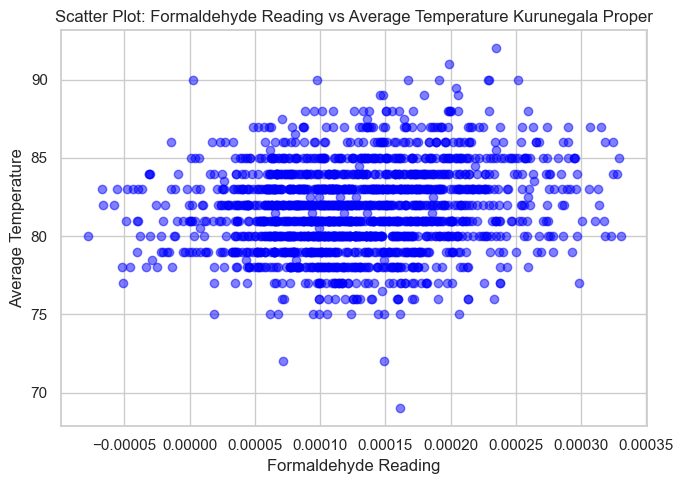

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(kurunegala_data["HCHO reading"], kurunegala_data["TAVG"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Average Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Average Temperature Kurunegala Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Colombo Weather Analysis

In [59]:
weather_colombo.head()

,Region,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
1705,Colombo Proper,6.9,79.867,7.0,2019-01-01,0.0,81,89.0,74.0
1706,Colombo Proper,6.9,79.867,7.0,2019-01-02,0.0,78,NaN,74.0
1707,Colombo Proper,6.9,79.867,7.0,2019-01-03,0.0,81,90.0,74.0
1708,Colombo Proper,6.9,79.867,7.0,2019-01-04,0.0,81,91.0,72.0
1709,Colombo Proper,6.9,79.867,7.0,2019-01-05,0.0,81,90.0,74.0


In [60]:
weather_colombo.shape

(1766, 9)

In [61]:
weather_colombo.isnull().sum()

Region         0
LATITUDE       0
LONGITUDE      0
ELEVATION      0
DATE           0
PRCP           9
TAVG           0
TMAX         210
TMIN         318
dtype: int64

In [62]:
# Assuming 'DATE' is a datetime column in your DataFrame
weather_colombo['DATE'] = pd.to_datetime(weather_colombo['DATE'])

# Set 'DATE' column as the index
weather_colombo.set_index('DATE', inplace=True)

# Reindex the DataFrame with a complete date range
full_date_range = pd.date_range(start=weather_colombo.index.min(), end=weather_colombo.index.max(), freq='D')
weather_colombo = weather_colombo.reindex(full_date_range)

# Reset index to remove 'DATE' as index and restore it as a column
weather_colombo.reset_index(inplace=True)


weather_colombo["DATE"] = weather_colombo["index"]    
weather_colombo.drop(columns=["index"], inplace=True)

In [63]:
weather_colombo.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN,DATE
count,1.766000e+03,1.766000e+03,1766.0,1757.000000,1766.000000,1556.000000,1448.000000,1827
mean,6.900000e+00,7.986700e+01,7.0,0.293773,82.433749,88.094473,77.293508,2021-07-02 00:00:00
min,6.900000e+00,7.986700e+01,7.0,0.000000,75.000000,79.000000,68.000000,2019-01-01 00:00:00
25%,6.900000e+00,7.986700e+01,7.0,0.000000,81.000000,87.000000,75.000000,2020-04-01 12:00:00
50%,6.900000e+00,7.986700e+01,7.0,0.010000,83.000000,88.000000,77.000000,2021-07-02 00:00:00
75%,6.900000e+00,7.986700e+01,7.0,0.260000,84.000000,90.000000,79.000000,2022-10-01 12:00:00
max,6.900000e+00,7.986700e+01,7.0,5.940000,87.000000,97.000000,84.000000,2024-01-01 00:00:00
std,1.776860e-15,1.421488e-14,0.0,0.654846,2.010137,2.237522,2.610152,NaN


In [64]:
weather_colombo.isnull().sum()

Region        61
LATITUDE      61
LONGITUDE     61
ELEVATION     61
PRCP          70
TAVG          61
TMAX         271
TMIN         379
DATE           0
dtype: int64

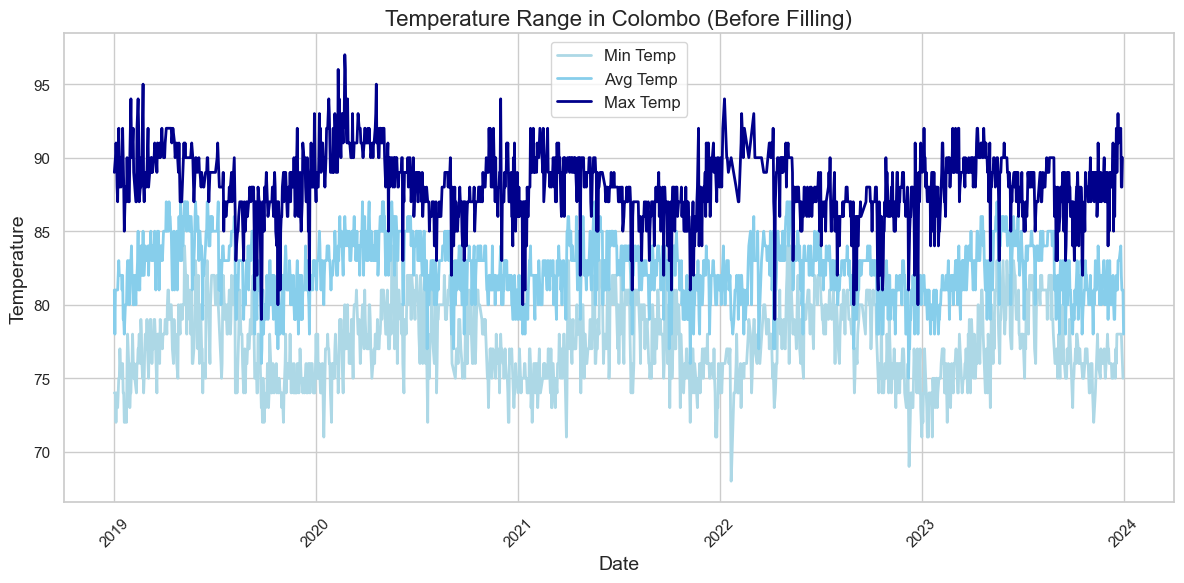

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_colombo, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_colombo, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_colombo, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Colombo (Before Filling)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [66]:
weather_colombo['PRCP'] = weather_colombo['PRCP'].fillna(weather_colombo['PRCP'].rolling(3, min_periods=1).mean())
weather_colombo["PRCP"] = weather_colombo["PRCP"].fillna(method="ffill")
weather_colombo["PRCP"] = weather_colombo["PRCP"].fillna(method="bfill")

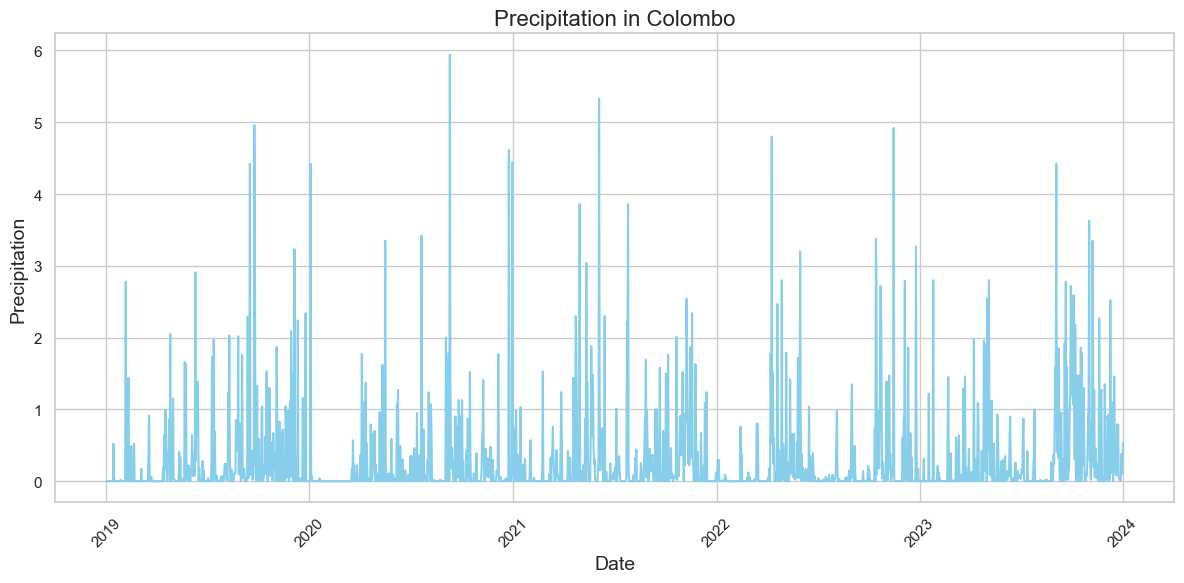

In [67]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_colombo['DATE'], weather_colombo['PRCP'], linestyle='-', color='skyblue')


plt.title('Precipitation in Colombo', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
weather_colombo['TMAX'] = weather_colombo['TMAX'].fillna(weather_colombo['TMAX'].rolling(3, min_periods=1).mean())
weather_colombo["TMAX"] = weather_colombo["TMAX"].fillna(method="ffill")
weather_colombo["TMAX"] = weather_colombo["TMAX"].fillna(method="bfill")

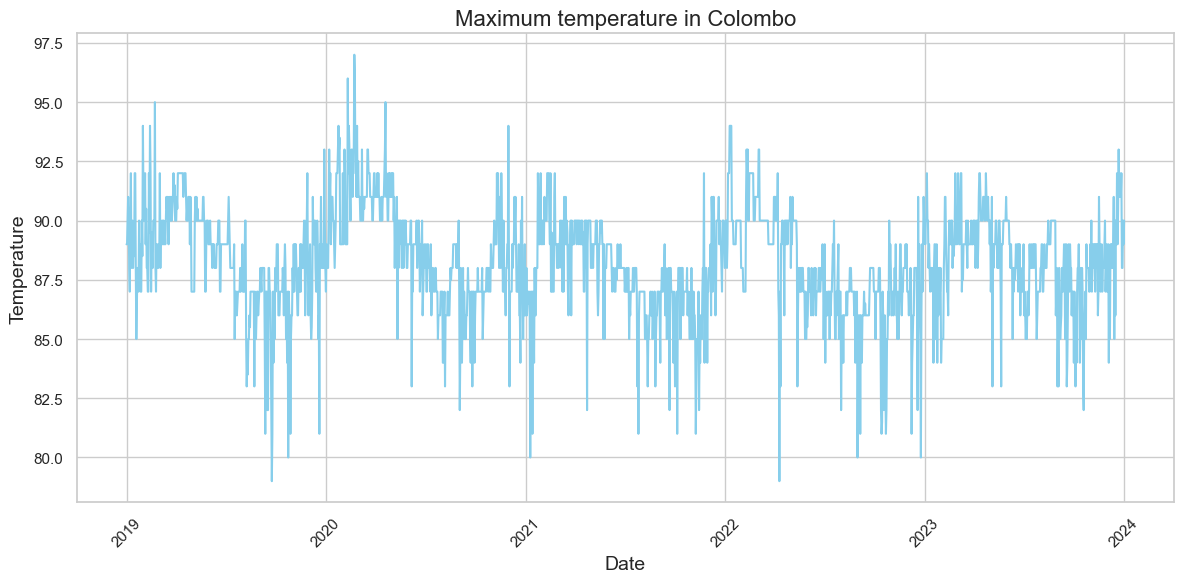

In [69]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_colombo['DATE'], weather_colombo['TMAX'], linestyle='-', color='skyblue')


plt.title('Maximum temperature in Colombo', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
weather_colombo['TMIN'] = weather_colombo['TMIN'].fillna(weather_colombo['TMIN'].rolling(3, min_periods=1).mean())
weather_colombo["TMIN"] = weather_colombo["TMIN"].fillna(method="ffill")
weather_colombo["TMIN"] = weather_colombo["TMIN"].fillna(method="bfill")

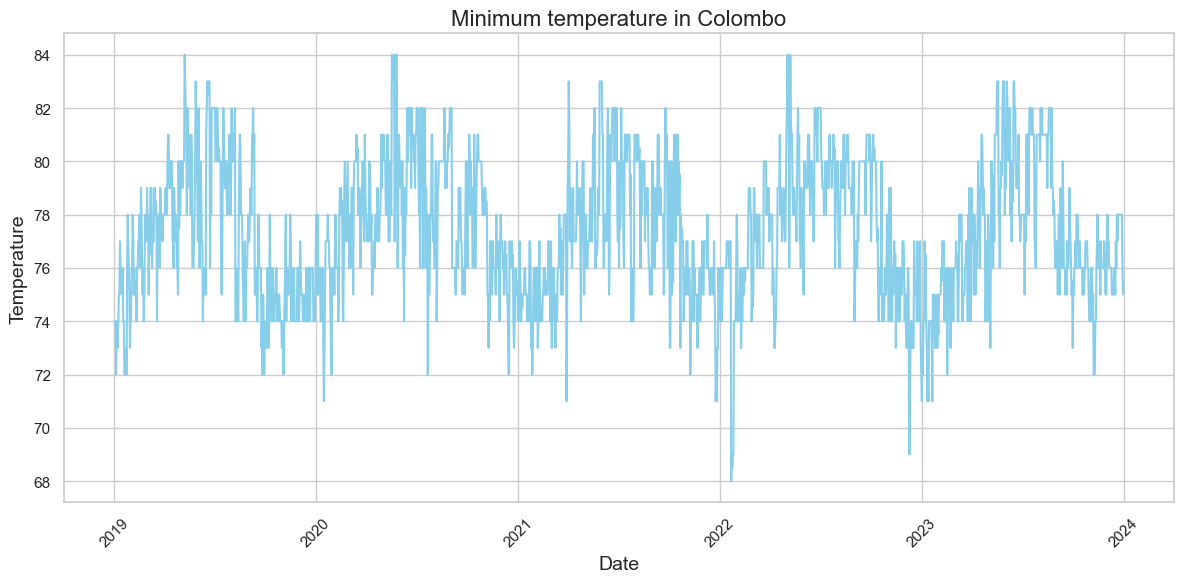

In [71]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_colombo['DATE'], weather_colombo['TMIN'], linestyle='-', color='skyblue')


plt.title('Minimum temperature in Colombo', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [72]:
weather_colombo['TAVG'] = weather_colombo['TAVG'].fillna(weather_colombo['TAVG'].rolling(3, min_periods=1).mean())
weather_colombo["TAVG"] = weather_colombo["TAVG"].fillna(method="ffill")
weather_colombo["TAVG"] = weather_colombo["TAVG"].fillna(method="bfill")

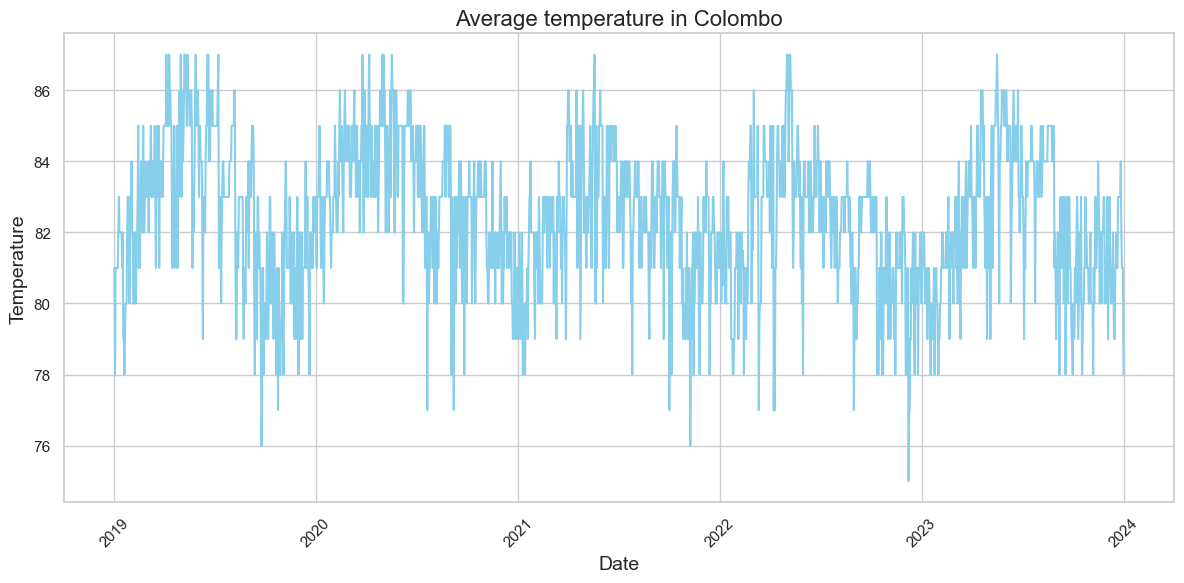

In [73]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_colombo['DATE'], weather_colombo['TAVG'], linestyle='-', color='skyblue')


plt.title('Average temperature in Colombo', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
weather_colombo.isnull().sum()

Region       61
LATITUDE     61
LONGITUDE    61
ELEVATION    61
PRCP          0
TAVG          0
TMAX          0
TMIN          0
DATE          0
dtype: int64

In [75]:
latitude_value = weather_colombo["LATITUDE"].mean()
longitude_value = weather_colombo["LONGITUDE"].mean()
elevation_value = weather_colombo["ELEVATION"].mean()
region_value = "Colombo Proper"

weather_colombo["LATITUDE"] =  weather_colombo["LATITUDE"].apply(lambda x : latitude_value)
weather_colombo["LONGITUDE"] = weather_colombo["LONGITUDE"].apply(lambda x : longitude_value)
weather_colombo["ELEVATION"] = weather_colombo["ELEVATION"].apply(lambda x : elevation_value)
weather_colombo["Region"] =  weather_colombo["Region"].apply(lambda x : region_value)

In [76]:
weather_colombo.isnull().sum()

Region       0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
PRCP         0
TAVG         0
TMAX         0
TMIN         0
DATE         0
dtype: int64

In [77]:
weather_colombo.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN,DATE
count,1.827000e+03,1.827000e+03,1827.0,1827.000000,1827.000000,1827.000000,1827.000000,1827
mean,6.900000e+00,7.986700e+01,7.0,0.286519,82.429666,88.207991,77.365353,2021-07-02 00:00:00
min,6.900000e+00,7.986700e+01,7.0,0.000000,75.000000,79.000000,68.000000,2019-01-01 00:00:00
25%,6.900000e+00,7.986700e+01,7.0,0.000000,81.000000,87.000000,76.000000,2020-04-01 12:00:00
50%,6.900000e+00,7.986700e+01,7.0,0.010000,83.000000,88.000000,77.000000,2021-07-02 00:00:00
75%,6.900000e+00,7.986700e+01,7.0,0.240000,84.000000,90.000000,79.000000,2022-10-01 12:00:00
max,6.900000e+00,7.986700e+01,7.0,5.940000,87.000000,97.000000,84.000000,2024-01-01 00:00:00
std,3.553686e-15,1.421475e-14,0.0,0.645145,2.003381,2.244924,2.610680,NaN


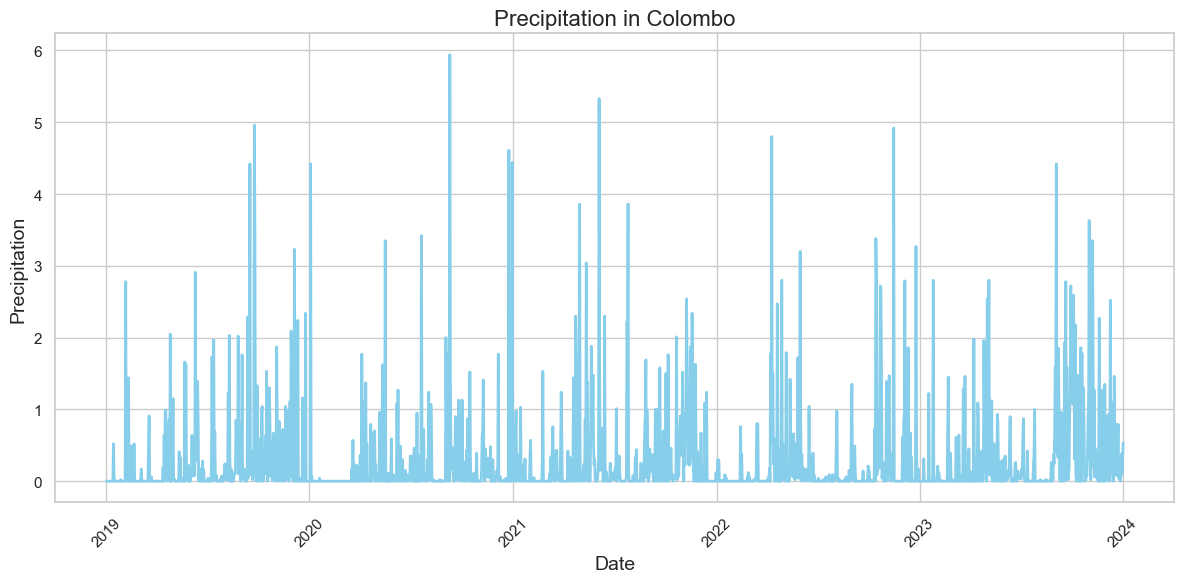

In [78]:
# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_colombo, x='DATE', y='PRCP', color='skyblue', linewidth=2)

# Customize titles and labels
plt.title('Precipitation in Colombo', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

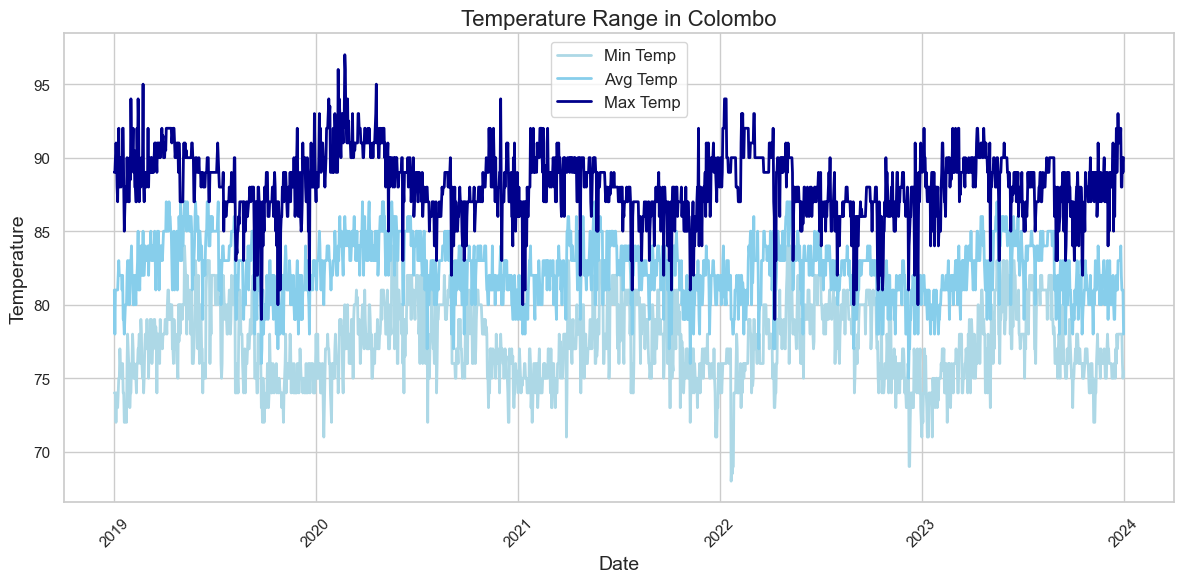

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_colombo, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_colombo, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_colombo, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Colombo', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [80]:
fomaldihyde_colombo = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/ColomboProperHandledNullValues.csv")

In [81]:
fomaldihyde_colombo.head()

,Current Date,Next Date,HCHO reading
0,2019-01-01,2019-01-02,0.000197
1,2019-01-02,2019-01-03,0.000263
2,2019-01-03,2019-01-04,0.000099
3,2019-01-04,2019-01-05,0.000210
4,2019-01-05,2019-01-06,0.000179


In [82]:
fomaldihyde_colombo.tail()

,Current Date,Next Date,HCHO reading
1821,2023-12-27,2023-12-28,0.000118
1822,2023-12-28,2023-12-29,0.000226
1823,2023-12-29,2023-12-30,0.000232
1824,2023-12-30,2023-12-31,0.000140
1825,2023-12-31,2024-01-01,0.000080


In [83]:
fomaldihyde_colombo.describe()

,HCHO reading
count,1826.000000
mean,0.000151
std,0.000086
min,-0.000112
25%,0.000092
50%,0.000144
75%,0.000209
max,0.000415


In [84]:
weather_colombo.head() 

,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN,DATE
0,Colombo Proper,6.9,79.867,7.0,0.0,81.0,89.0,74.0,2019-01-01
1,Colombo Proper,6.9,79.867,7.0,0.0,78.0,89.0,74.0,2019-01-02
2,Colombo Proper,6.9,79.867,7.0,0.0,81.0,90.0,74.0,2019-01-03
3,Colombo Proper,6.9,79.867,7.0,0.0,81.0,91.0,72.0,2019-01-04
4,Colombo Proper,6.9,79.867,7.0,0.0,81.0,90.0,74.0,2019-01-05


In [85]:
weather_colombo.rename(columns={"DATE":"Current Date"}, inplace=True)

In [86]:
# Convert the column in the 'object' type DataFrame to 'datetime64[ns]'
fomaldihyde_colombo['Current Date'] = pd.to_datetime(fomaldihyde_colombo['Current Date'])

# Perform outer join
colombo_data = pd.merge(fomaldihyde_colombo, weather_colombo, on='Current Date', how='outer')

In [87]:
weather_colombo["Current Date"].unique().shape

(1827,)

In [88]:
weather_colombo.isnull().sum() 

Region          0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
PRCP            0
TAVG            0
TMAX            0
TMIN            0
Current Date    0
dtype: int64

In [89]:
colombo_data.drop(1826, inplace=True)
colombo_data.shape

(1826, 11)

In [90]:
colombo_data.isnull().sum() 

Current Date    0
Next Date       0
HCHO reading    0
Region          0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
PRCP            0
TAVG            0
TMAX            0
TMIN            0
dtype: int64

In [91]:
colombo_data.head()

,Current Date,Next Date,HCHO reading,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
0,2019-01-01,2019-01-02,0.000197,Colombo Proper,6.9,79.867,7.0,0.0,81.0,89.0,74.0
1,2019-01-02,2019-01-03,0.000263,Colombo Proper,6.9,79.867,7.0,0.0,78.0,89.0,74.0
2,2019-01-03,2019-01-04,0.000099,Colombo Proper,6.9,79.867,7.0,0.0,81.0,90.0,74.0
3,2019-01-04,2019-01-05,0.000210,Colombo Proper,6.9,79.867,7.0,0.0,81.0,91.0,72.0
4,2019-01-05,2019-01-06,0.000179,Colombo Proper,6.9,79.867,7.0,0.0,81.0,90.0,74.0


In [92]:
colombo_data.tail()

,Current Date,Next Date,HCHO reading,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
1821,2023-12-27,2023-12-28,0.000118,Colombo Proper,6.9,79.867,7.0,0.00,84.0,92.0,78.0
1822,2023-12-28,2023-12-29,0.000226,Colombo Proper,6.9,79.867,7.0,0.07,82.0,88.0,78.0
1823,2023-12-29,2023-12-30,0.000232,Colombo Proper,6.9,79.867,7.0,0.38,81.0,88.0,78.0
1824,2023-12-30,2023-12-31,0.000140,Colombo Proper,6.9,79.867,7.0,0.10,81.0,90.0,76.0
1825,2023-12-31,2024-01-01,0.000080,Colombo Proper,6.9,79.867,7.0,0.33,81.0,89.0,75.0


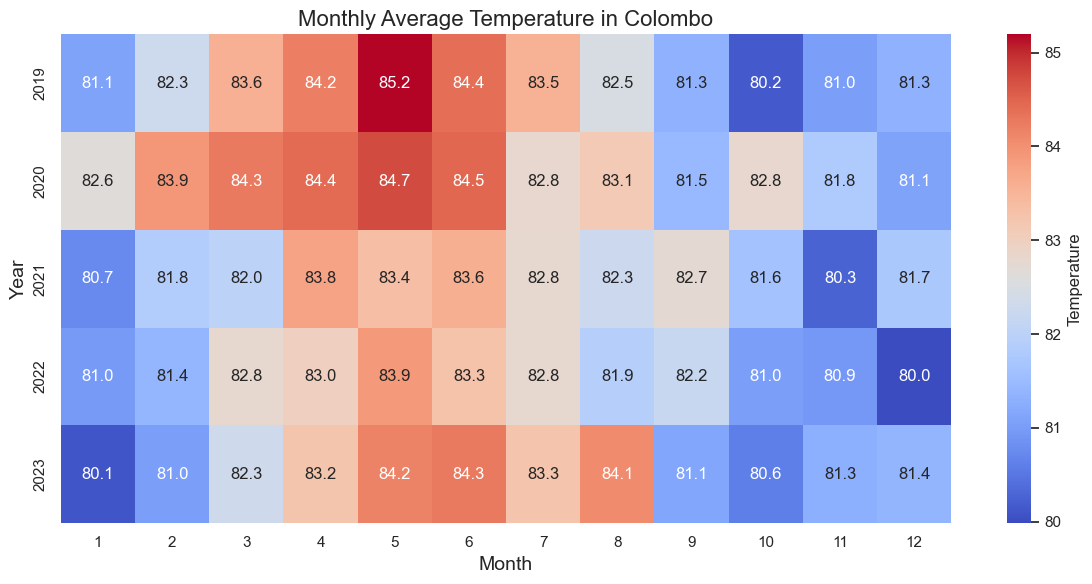

In [93]:
# Convert the 'Current Date' column to datetime format
colombo_data['Year'] = colombo_data['Current Date'].dt.year
colombo_data['Month'] = colombo_data['Current Date'].dt.month

# Pivot the data to have years as rows and months as columns
weather_pivot = colombo_data.pivot_table(index='Year', columns='Month', values='TAVG', aggfunc='mean')

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the heatmap
sns.heatmap(weather_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Temperature'})

# Customize titles and labels
plt.title('Monthly Average Temperature in Colombo', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [94]:
colombo_data.drop(columns=["Year", "Month"], inplace=True)

In [95]:
colombo_data.head()

,Current Date,Next Date,HCHO reading,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
0,2019-01-01,2019-01-02,0.000197,Colombo Proper,6.9,79.867,7.0,0.0,81.0,89.0,74.0
1,2019-01-02,2019-01-03,0.000263,Colombo Proper,6.9,79.867,7.0,0.0,78.0,89.0,74.0
2,2019-01-03,2019-01-04,0.000099,Colombo Proper,6.9,79.867,7.0,0.0,81.0,90.0,74.0
3,2019-01-04,2019-01-05,0.000210,Colombo Proper,6.9,79.867,7.0,0.0,81.0,91.0,72.0
4,2019-01-05,2019-01-06,0.000179,Colombo Proper,6.9,79.867,7.0,0.0,81.0,90.0,74.0


In [96]:
colombo_data.describe()

,Current Date,HCHO reading,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
count,1826,1826.000000,1.826000e+03,1.826000e+03,1826.0,1826.000000,1826.000000,1826.000000,1826.000000
mean,2021-07-01 12:00:00,0.000151,6.900000e+00,7.986700e+01,7.0,0.286386,82.432092,88.207010,77.366375
min,2019-01-01 00:00:00,-0.000112,6.900000e+00,7.986700e+01,7.0,0.000000,75.000000,79.000000,68.000000
25%,2020-04-01 06:00:00,0.000092,6.900000e+00,7.986700e+01,7.0,0.000000,81.000000,87.000000,76.000000
50%,2021-07-01 12:00:00,0.000144,6.900000e+00,7.986700e+01,7.0,0.010000,83.000000,88.000000,77.000000
75%,2022-09-30 18:00:00,0.000209,6.900000e+00,7.986700e+01,7.0,0.240000,84.000000,90.000000,79.000000
max,2023-12-31 00:00:00,0.000415,6.900000e+00,7.986700e+01,7.0,5.940000,87.000000,97.000000,84.000000
std,NaN,0.000086,2.665265e-15,2.842950e-14,0.0,0.645297,2.001243,2.245147,2.611030


In [97]:
colombo_data[kurunegala_data["LATITUDE"].isna() == True] 

,Current Date,Next Date,HCHO reading,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN


In [98]:
colombo_data_copy = colombo_data.copy()

# Drop specified columns
colombo_data_copy.drop(columns=["LATITUDE", "LONGITUDE", "ELEVATION"], inplace=True)

# Calculate correlation matrix using Pearson method
correlation_matrix =  colombo_data_copy.corr(method="pearson", numeric_only=True)
correlation_matrix

,HCHO reading,PRCP,TAVG,TMAX,TMIN
HCHO reading,1.000000,-0.093883,-0.056770,0.337612,-0.235119
PRCP,-0.093883,1.000000,-0.359612,-0.321459,-0.277047
TAVG,-0.056770,-0.359612,1.000000,0.511461,0.659455
TMAX,0.337612,-0.321459,0.511461,1.000000,0.096884
TMIN,-0.235119,-0.277047,0.659455,0.096884,1.000000


#### This shows that Maximum and Minimum temperatures have a slight correlation with HCHO reading

In [99]:
colombo_data_copy.corr(method="pearson", numeric_only=True)["HCHO reading"]

HCHO reading    1.000000
PRCP           -0.093883
TAVG           -0.056770
TMAX            0.337612
TMIN           -0.235119
Name: HCHO reading, dtype: float64

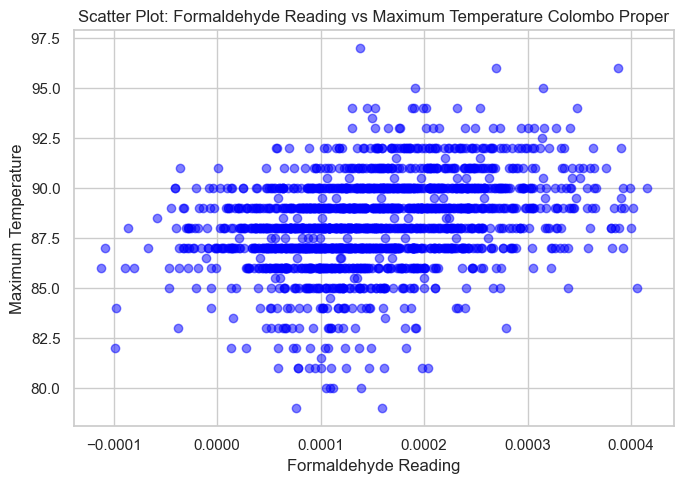

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(colombo_data["HCHO reading"], colombo_data["TMAX"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Maximum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Maximum Temperature Colombo Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout() 
plt.show()

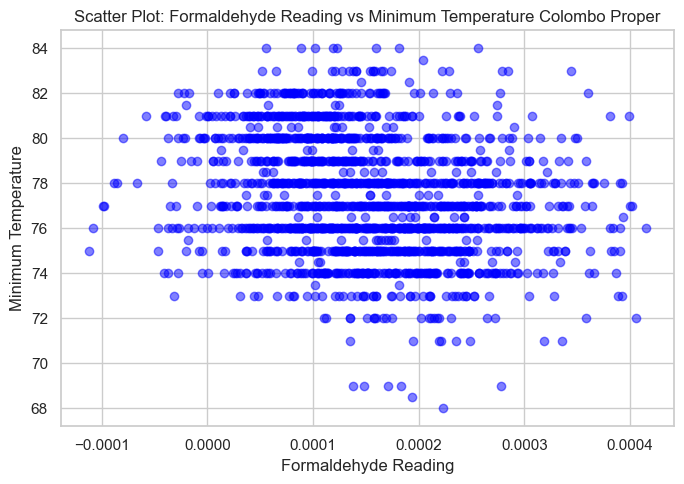

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(colombo_data["HCHO reading"], colombo_data["TMIN"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Minimum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Minimum Temperature Colombo Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

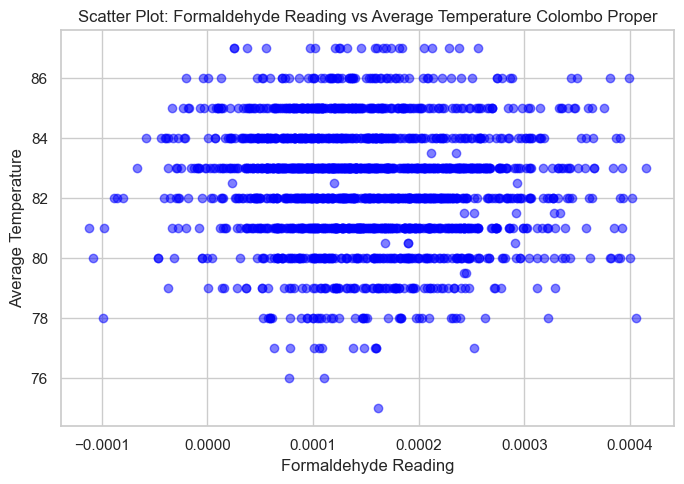

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(colombo_data["HCHO reading"], colombo_data["TAVG"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Average Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Average Temperature Colombo Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Nuwara Eliya Proper Analysis

In [103]:
weather_nuwara_eliya.head()

,Region,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
3471,Nuwara Eliya Proper,6.967,80.767,1880.0,2019-01-01,0.0,61,71.0,49.0
3472,Nuwara Eliya Proper,6.967,80.767,1880.0,2019-01-02,0.0,59,NaN,49.0
3473,Nuwara Eliya Proper,6.967,80.767,1880.0,2019-01-03,0.0,59,71.0,49.0
3474,Nuwara Eliya Proper,6.967,80.767,1880.0,2019-01-04,0.0,59,72.0,47.0
3475,Nuwara Eliya Proper,6.967,80.767,1880.0,2019-01-05,0.0,55,68.0,NaN


In [104]:
weather_nuwara_eliya.shape

(1762, 9)

In [105]:
weather_nuwara_eliya.isnull().sum()

Region         0
LATITUDE       0
LONGITUDE      0
ELEVATION      0
DATE           0
PRCP           5
TAVG           0
TMAX         214
TMIN         344
dtype: int64

In [106]:
# Assuming 'DATE' is a datetime column in your DataFrame
weather_nuwara_eliya['DATE'] = pd.to_datetime(weather_nuwara_eliya['DATE'])

# Set 'DATE' column as the index
weather_nuwara_eliya.set_index('DATE', inplace=True)

# Reindex the DataFrame with a complete date range
full_date_range = pd.date_range(start=weather_nuwara_eliya.index.min(), end=weather_nuwara_eliya.index.max(), freq='D')
weather_nuwara_eliya = weather_nuwara_eliya.reindex(full_date_range)

# Reset index to remove 'DATE' as index and restore it as a column
weather_nuwara_eliya.reset_index(inplace=True)


weather_nuwara_eliya["DATE"] = weather_nuwara_eliya["index"]    
weather_nuwara_eliya.drop(columns=["index"], inplace=True)

In [107]:
weather_nuwara_eliya.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN,DATE
count,1762.000,1.762000e+03,1762.0,1757.000000,1762.000000,1548.000000,1418.000000,1827
mean,6.967,8.076700e+01,1880.0,0.206113,60.961975,68.684109,54.129055,2021-07-02 00:00:00
min,6.967,8.076700e+01,1880.0,0.000000,51.000000,56.000000,37.000000,2019-01-01 00:00:00
25%,6.967,8.076700e+01,1880.0,0.000000,60.000000,66.000000,52.000000,2020-04-01 12:00:00
50%,6.967,8.076700e+01,1880.0,0.010000,61.000000,69.000000,55.000000,2021-07-02 00:00:00
75%,6.967,8.076700e+01,1880.0,0.200000,62.000000,71.000000,57.000000,2022-10-01 12:00:00
max,6.967,8.076700e+01,1880.0,4.250000,68.000000,92.000000,61.000000,2024-01-01 00:00:00
std,0.000,1.421489e-14,0.0,0.430812,1.926304,3.683374,3.882118,NaN


In [108]:
weather_nuwara_eliya.isnull().sum()

Region        65
LATITUDE      65
LONGITUDE     65
ELEVATION     65
PRCP          70
TAVG          65
TMAX         279
TMIN         409
DATE           0
dtype: int64

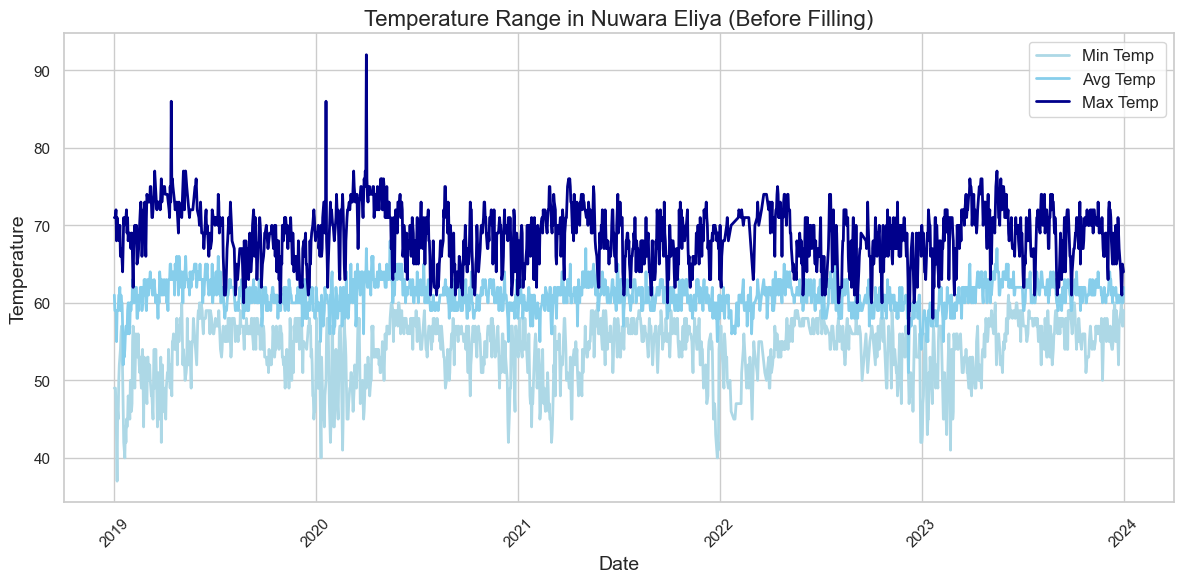

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Nuwara Eliya (Before Filling)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [110]:
weather_nuwara_eliya['PRCP'] = weather_nuwara_eliya['PRCP'].fillna(weather_nuwara_eliya['PRCP'].rolling(3, min_periods=1).mean())
weather_nuwara_eliya["PRCP"] = weather_nuwara_eliya["PRCP"].fillna(method="ffill")
weather_nuwara_eliya["PRCP"] = weather_nuwara_eliya["PRCP"].fillna(method="bfill")

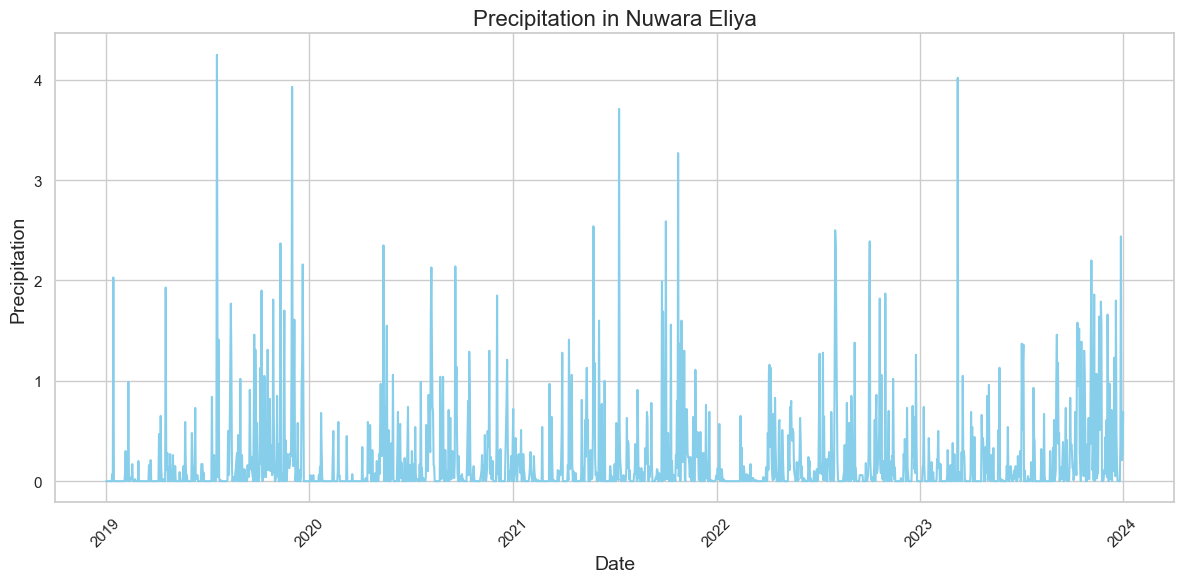

In [111]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_nuwara_eliya['DATE'], weather_nuwara_eliya['PRCP'], linestyle='-', color='skyblue')


plt.title('Precipitation in Nuwara Eliya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [112]:
weather_nuwara_eliya['TMAX'] = weather_nuwara_eliya['TMAX'].fillna(weather_nuwara_eliya['TMAX'].rolling(3, min_periods=1).mean())
weather_nuwara_eliya["TMAX"] = weather_nuwara_eliya["TMAX"].fillna(method="ffill")
weather_nuwara_eliya["TMAX"] = weather_nuwara_eliya["TMAX"].fillna(method="bfill")

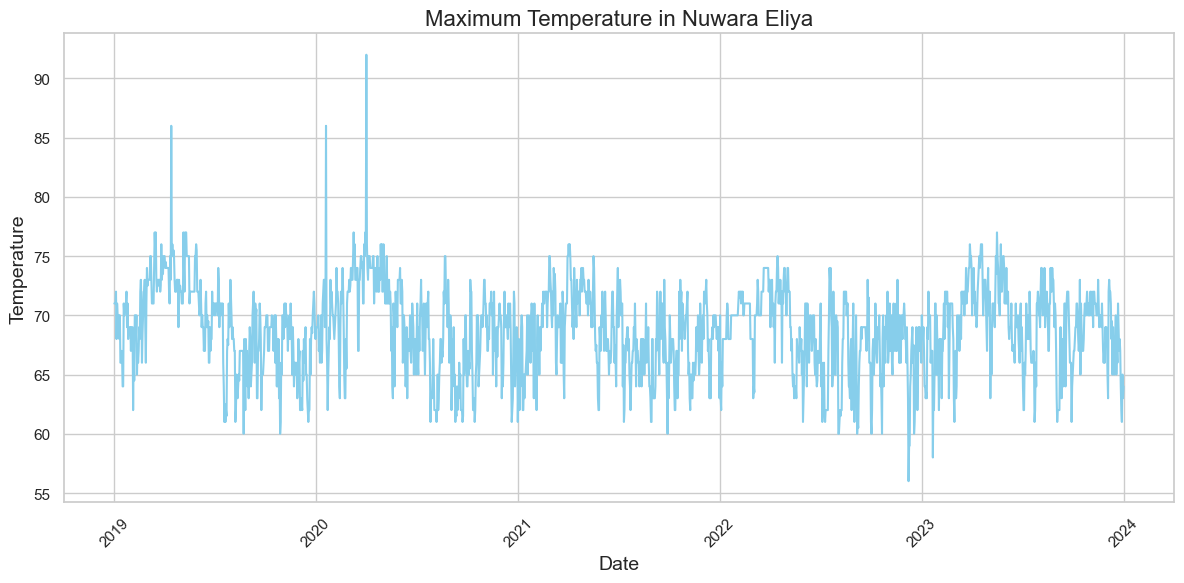

In [113]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_nuwara_eliya['DATE'], weather_nuwara_eliya['TMAX'], linestyle='-', color='skyblue')


plt.title('Maximum Temperature in Nuwara Eliya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [114]:
weather_nuwara_eliya['TMIN'] = weather_nuwara_eliya['TMIN'].fillna(weather_nuwara_eliya['TMIN'].rolling(3, min_periods=1).mean())
weather_nuwara_eliya["TMIN"] = weather_nuwara_eliya["TMIN"].fillna(method="ffill")
weather_nuwara_eliya["TMIN"] = weather_nuwara_eliya["TMIN"].fillna(method="bfill")

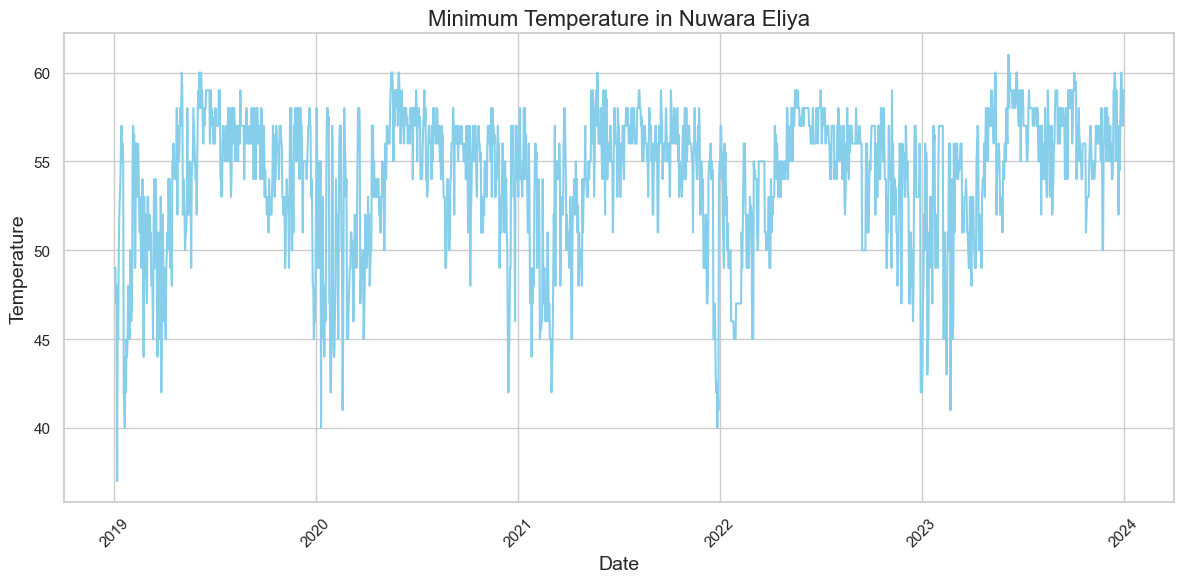

In [115]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_nuwara_eliya['DATE'], weather_nuwara_eliya['TMIN'], linestyle='-', color='skyblue')


plt.title('Minimum Temperature in Nuwara Eliya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [116]:
weather_nuwara_eliya['TAVG'] = weather_nuwara_eliya['TAVG'].fillna(weather_nuwara_eliya['TAVG'].rolling(3, min_periods=1).mean())
weather_nuwara_eliya["TAVG"] = weather_nuwara_eliya["TAVG"].fillna(method="ffill")
weather_nuwara_eliya["TAVG"] = weather_nuwara_eliya["TAVG"].fillna(method="bfill")

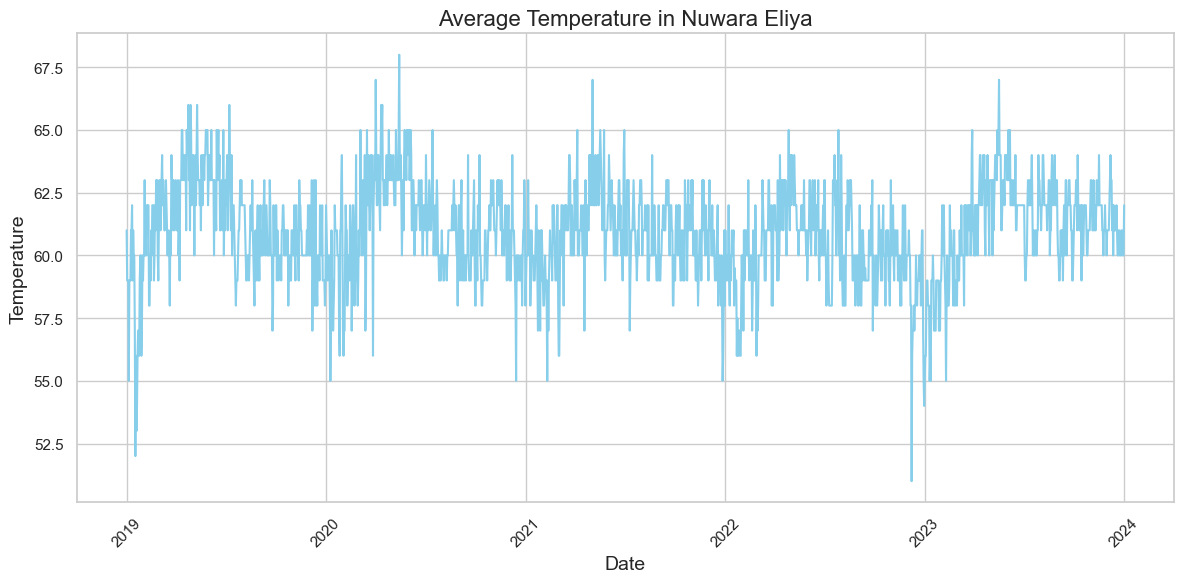

In [117]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_nuwara_eliya['DATE'], weather_nuwara_eliya['TAVG'], linestyle='-', color='skyblue')


plt.title('Average Temperature in Nuwara Eliya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [118]:
weather_nuwara_eliya.isnull().sum()

Region       65
LATITUDE     65
LONGITUDE    65
ELEVATION    65
PRCP          0
TAVG          0
TMAX          0
TMIN          0
DATE          0
dtype: int64

In [119]:
latitude_value = weather_nuwara_eliya["LATITUDE"].mean()
longitude_value = weather_nuwara_eliya["LONGITUDE"].mean()
elevation_value = weather_nuwara_eliya["ELEVATION"].mean()
region_value = "Nuwara Eliya Proper"

weather_nuwara_eliya["LATITUDE"] =  weather_nuwara_eliya["LATITUDE"].apply(lambda x : latitude_value)
weather_nuwara_eliya["LONGITUDE"] = weather_nuwara_eliya["LONGITUDE"].apply(lambda x : longitude_value)
weather_nuwara_eliya["ELEVATION"] = weather_nuwara_eliya["ELEVATION"].apply(lambda x : elevation_value)
weather_nuwara_eliya["Region"] =  weather_nuwara_eliya["Region"].apply(lambda x : region_value)

In [120]:
weather_nuwara_eliya.isnull().sum()

Region       0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
PRCP         0
TAVG         0
TMAX         0
TMIN         0
DATE         0
dtype: int64

In [121]:
weather_nuwara_eliya.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN,DATE
count,1.827000e+03,1.827000e+03,1827.0,1827.000000,1827.000000,1827.000000,1827.000000,1827
mean,6.967000e+00,8.076700e+01,1880.0,0.199611,60.923098,68.793103,54.130268,2021-07-02 00:00:00
min,6.967000e+00,8.076700e+01,1880.0,0.000000,51.000000,56.000000,37.000000,2019-01-01 00:00:00
25%,6.967000e+00,8.076700e+01,1880.0,0.000000,60.000000,66.000000,52.000000,2020-04-01 12:00:00
50%,6.967000e+00,8.076700e+01,1880.0,0.010000,61.000000,69.000000,55.000000,2021-07-02 00:00:00
75%,6.967000e+00,8.076700e+01,1880.0,0.190000,62.000000,71.000000,57.000000,2022-10-01 12:00:00
max,6.967000e+00,8.076700e+01,1880.0,4.250000,68.000000,92.000000,61.000000,2024-01-01 00:00:00
std,8.884216e-16,1.421475e-14,0.0,0.424112,1.931103,3.632509,3.832365,NaN


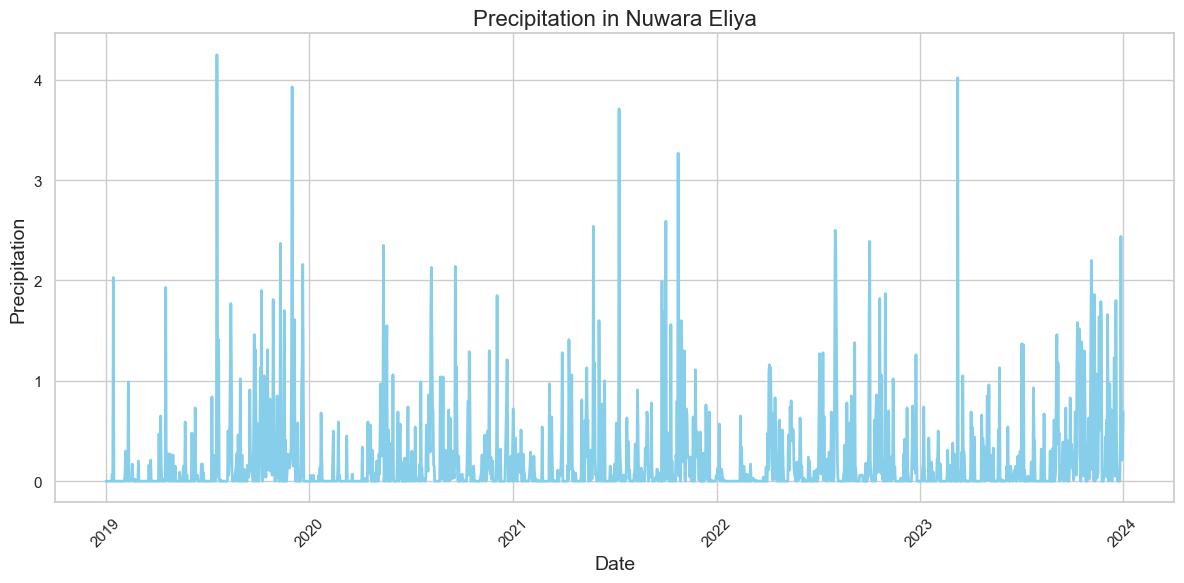

In [122]:
# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='PRCP', color='skyblue', linewidth=2)

# Customize titles and labels
plt.title('Precipitation in Nuwara Eliya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

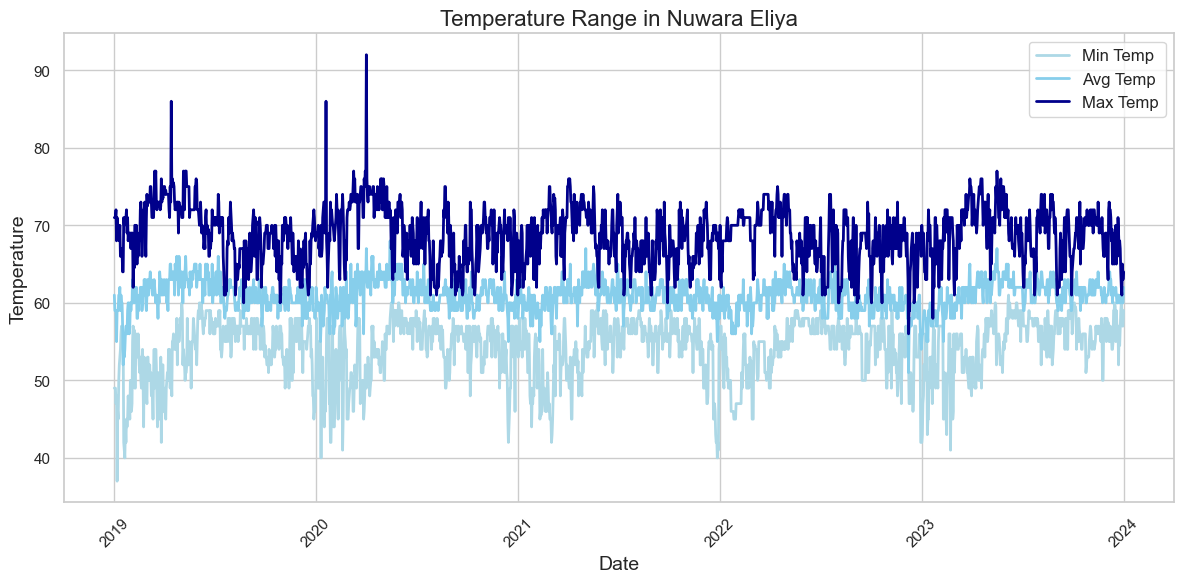

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Nuwara Eliya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [124]:
fomaldihyde_nuwara_eliya = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/NuwaraEliyaHandledNullValues.csv")

In [125]:
fomaldihyde_nuwara_eliya.head()

,Current Date,Next Date,HCHO reading
0,2019-01-01,2019-01-02,0.000191
1,2019-01-02,2019-01-03,0.000191
2,2019-01-03,2019-01-04,0.000191
3,2019-01-04,2019-01-05,0.000051
4,2019-01-05,2019-01-06,0.000065


In [126]:
fomaldihyde_nuwara_eliya.tail()

,Current Date,Next Date,HCHO reading
1821,2023-12-27,2023-12-28,0.000043
1822,2023-12-28,2023-12-29,0.000043
1823,2023-12-29,2023-12-30,0.000043
1824,2023-12-30,2023-12-31,0.000043
1825,2023-12-31,2024-01-01,0.000043


In [127]:
fomaldihyde_nuwara_eliya.describe()

,HCHO reading
count,1826.000000
mean,0.000083
std,0.000054
min,-0.000109
25%,0.000054
50%,0.000079
75%,0.000110
max,0.000293


In [128]:
weather_nuwara_eliya.head() 

,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN,DATE
0,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,61.0,71.0,49.0,2019-01-01
1,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,59.0,71.0,49.0,2019-01-02
2,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,59.0,71.0,49.0,2019-01-03
3,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,59.0,72.0,47.0,2019-01-04
4,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,55.0,68.0,48.0,2019-01-05


In [129]:
weather_nuwara_eliya.rename(columns={"DATE":"Current Date"}, inplace=True)

In [130]:
# Convert the column in the 'object' type DataFrame to 'datetime64[ns]'
fomaldihyde_nuwara_eliya['Current Date'] = pd.to_datetime(fomaldihyde_nuwara_eliya['Current Date'])

# Perform outer join
nuwara_eliya_data = pd.merge(fomaldihyde_nuwara_eliya, weather_nuwara_eliya, on='Current Date', how='outer')

In [131]:
weather_nuwara_eliya["Current Date"].unique().shape

(1827,)

In [132]:
weather_nuwara_eliya.isnull().sum() 

Region          0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
PRCP            0
TAVG            0
TMAX            0
TMIN            0
Current Date    0
dtype: int64

In [133]:
nuwara_eliya_data.drop(1826, inplace=True)
nuwara_eliya_data.shape

(1826, 11)

In [134]:
nuwara_eliya_data.head()

,Current Date,Next Date,HCHO reading,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
0,2019-01-01,2019-01-02,0.000191,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,61.0,71.0,49.0
1,2019-01-02,2019-01-03,0.000191,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,59.0,71.0,49.0
2,2019-01-03,2019-01-04,0.000191,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,59.0,71.0,49.0
3,2019-01-04,2019-01-05,0.000051,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,59.0,72.0,47.0
4,2019-01-05,2019-01-06,0.000065,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,55.0,68.0,48.0


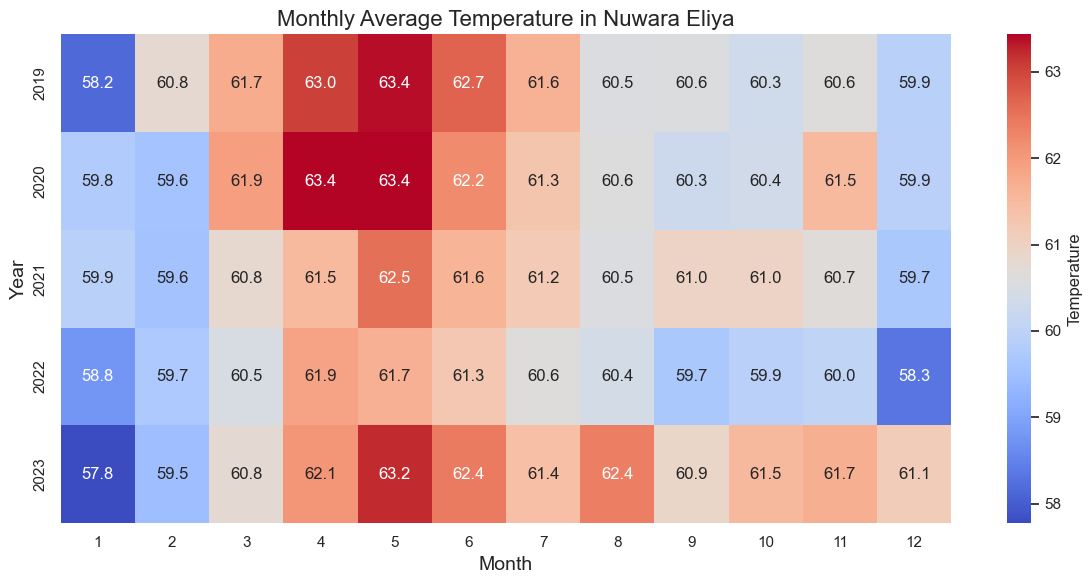

In [135]:
# Convert the 'Current Date' column to datetime format
nuwara_eliya_data['Year'] = nuwara_eliya_data['Current Date'].dt.year
nuwara_eliya_data['Month'] = nuwara_eliya_data['Current Date'].dt.month

# Pivot the data to have years as rows and months as columns
weather_pivot = nuwara_eliya_data.pivot_table(index='Year', columns='Month', values='TAVG', aggfunc='mean')

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the heatmap
sns.heatmap(weather_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Temperature'})

# Customize titles and labels
plt.title('Monthly Average Temperature in Nuwara Eliya', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [136]:
nuwara_eliya_data.drop(columns=["Year", "Month"], inplace=True)

In [137]:
nuwara_eliya_data.tail()

,Current Date,Next Date,HCHO reading,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
1821,2023-12-27,2023-12-28,0.000043,Nuwara Eliya Proper,6.967,80.767,1880.0,0.35,61.0,64.0,59.0
1822,2023-12-28,2023-12-29,0.000043,Nuwara Eliya Proper,6.967,80.767,1880.0,2.44,61.0,62.0,60.0
1823,2023-12-29,2023-12-30,0.000043,Nuwara Eliya Proper,6.967,80.767,1880.0,0.64,60.0,61.0,59.0
1824,2023-12-30,2023-12-31,0.000043,Nuwara Eliya Proper,6.967,80.767,1880.0,0.21,60.0,65.0,57.0
1825,2023-12-31,2024-01-01,0.000043,Nuwara Eliya Proper,6.967,80.767,1880.0,0.28,60.0,63.0,57.0


In [138]:
nuwara_eliya_data.describe()

,Current Date,HCHO reading,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
count,1826,1826.000000,1.826000e+03,1826.000,1826.0,1826.000000,1826.000000,1826.000000,1826.000000
mean,2021-07-01 12:00:00,0.000083,6.967000e+00,80.767,1880.0,0.199343,60.922508,68.795728,54.127601
min,2019-01-01 00:00:00,-0.000109,6.967000e+00,80.767,1880.0,0.000000,51.000000,56.000000,37.000000
25%,2020-04-01 06:00:00,0.000054,6.967000e+00,80.767,1880.0,0.000000,60.000000,66.000000,52.000000
50%,2021-07-01 12:00:00,0.000079,6.967000e+00,80.767,1880.0,0.010000,61.000000,69.000000,55.000000
75%,2022-09-30 18:00:00,0.000110,6.967000e+00,80.767,1880.0,0.190000,62.000000,71.000000,57.000000
max,2023-12-31 00:00:00,0.000293,6.967000e+00,80.767,1880.0,4.250000,68.000000,92.000000,61.000000
std,NaN,0.000054,8.884217e-16,0.000,0.0,0.424073,1.931468,3.631771,3.831718


In [139]:
nuwara_eliya_data[nuwara_eliya_data["LATITUDE"].isna() == True] 

,Current Date,Next Date,HCHO reading,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN


In [140]:
nuwara_eliya_data_copy = nuwara_eliya_data.copy()

# Drop specified columns
nuwara_eliya_data_copy.drop(columns=["LATITUDE", "LONGITUDE", "ELEVATION"], inplace=True)

# Calculate correlation matrix using Pearson method
correlation_matrix =  nuwara_eliya_data_copy.corr(method="pearson", numeric_only=True)
correlation_matrix

,HCHO reading,PRCP,TAVG,TMAX,TMIN
HCHO reading,1.000000,-0.025234,0.029537,0.153014,-0.139301
PRCP,-0.025234,1.000000,-0.086181,-0.273322,0.201576
TAVG,0.029537,-0.086181,1.000000,0.522359,0.326624
TMAX,0.153014,-0.273322,0.522359,1.000000,-0.363431
TMIN,-0.139301,0.201576,0.326624,-0.363431,1.000000


In [141]:
#### This shows that Maximum and Minimum temperatures have a very slight correlation with HCHO reading

In [142]:
nuwara_eliya_data_copy.corr(method="pearson", numeric_only=True)["HCHO reading"]

HCHO reading    1.000000
PRCP           -0.025234
TAVG            0.029537
TMAX            0.153014
TMIN           -0.139301
Name: HCHO reading, dtype: float64

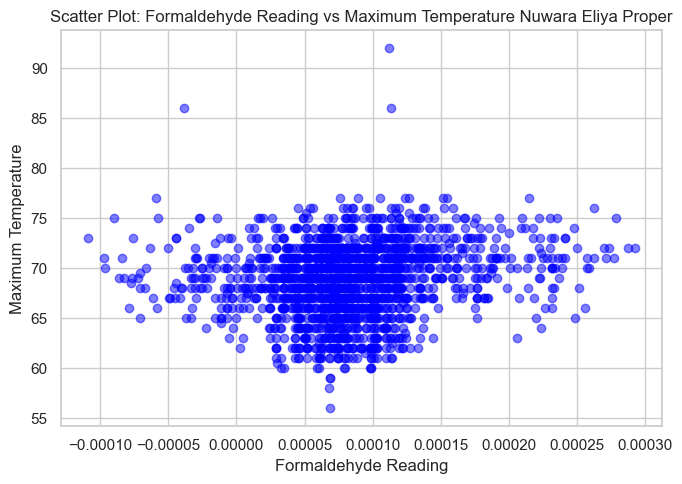

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(nuwara_eliya_data["HCHO reading"], nuwara_eliya_data["TMAX"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Maximum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Maximum Temperature Nuwara Eliya Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout() 
plt.show()

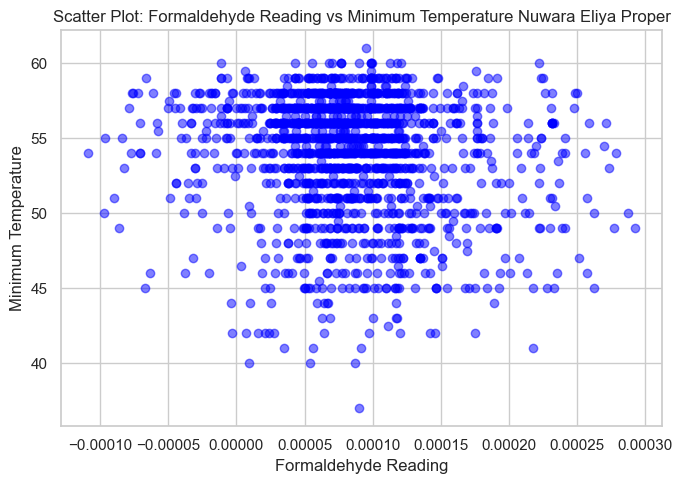

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(nuwara_eliya_data["HCHO reading"], nuwara_eliya_data["TMIN"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Minimum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Minimum Temperature Nuwara Eliya Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show() 

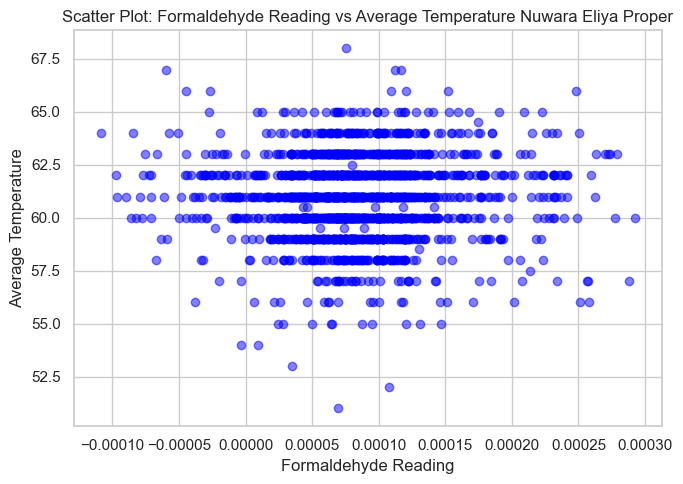

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(nuwara_eliya_data["HCHO reading"], nuwara_eliya_data["TAVG"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Average Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Average Temperature Nuwara Eliya Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Other Region Weather Data Analysis

In [146]:
# data = pd.read_csv("../FomaldihydeAnalysis/OtherData/SriLanka_Weather_Dataset.csv", date_parser=["time"]) 

In [147]:
# data['time'] = pd.to_datetime(data['time'])

# # Filter dates within the specified range
# start_date = pd.to_datetime('2018-12-31')
# end_date = pd.to_datetime('2024-01-01')
# data = data[(data['time'] > start_date) & (data['time'] < end_date)]
# data = data[["time", ""]]

In [148]:
# weather_kandy = data[data["city"] == "Kandy"]

In [149]:
# weather_matara  = data[data["city"] == "Matara"]

### Kandy weather Analysis

In [150]:
# weather_kandy.tail()

## population data Adding

#### site to refer - https://www.rgd.gov.lk/web/index.php?option=com_content&view=article&id=136&Itemid=294&lang=si#%E0%B7%80%E0%B7%83%E0%B6%BB-%E0%B6%B8%E0%B7%90%E0%B6%AF-%E0%B6%A2%E0%B6%B1%E0%B6%9C%E0%B7%84%E0%B6%B1%E0%B6%BA-%E0%B6%B4%E0%B7%92%E0%B7%85%E0%B7%92%E0%B6%B6%E0%B6%B3-%E0%B6%87%E0%B7%83%E0%B7%8A%E0%B6%AD%E0%B6%B8%E0%B7%9A%E0%B6%B1%E0%B7%8A%E0%B6%AD%E0%B7%94

#### area details - https://www.citypopulation.de/en/srilanka/prov/admin/

#### Assumption - population data will not change in higher ratios between 5 year. (2021 data is taken)

#### Colombo data population

In [151]:
colombo_data.head()

,Current Date,Next Date,HCHO reading,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
0,2019-01-01,2019-01-02,0.000197,Colombo Proper,6.9,79.867,7.0,0.0,81.0,89.0,74.0
1,2019-01-02,2019-01-03,0.000263,Colombo Proper,6.9,79.867,7.0,0.0,78.0,89.0,74.0
2,2019-01-03,2019-01-04,0.000099,Colombo Proper,6.9,79.867,7.0,0.0,81.0,90.0,74.0
3,2019-01-04,2019-01-05,0.000210,Colombo Proper,6.9,79.867,7.0,0.0,81.0,91.0,72.0
4,2019-01-05,2019-01-06,0.000179,Colombo Proper,6.9,79.867,7.0,0.0,81.0,90.0,74.0


In [152]:
population_values = {
    2019: 2448000,
    2020: 2455000,
    2021: 2480000,
    2022: 2478000,
    2023: 2460000
}

colombo_data['Year'] = pd.to_datetime(colombo_data['Current Date']).dt.year

colombo_data['Population'] = colombo_data['Year'].map(population_values)

colombo_data.drop(columns=["Year"], inplace=True)

colombo_data["Area_sq_km"] = [699 for x in range(0, len(colombo_data))]

colombo_data["population_density"] = (colombo_data['Population'] / colombo_data["Area_sq_km"])

colombo_data["population_density"] = colombo_data["population_density"].round(2) 

In [153]:
colombo_data.head()

,Current Date,Next Date,HCHO reading,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN,Population,Area_sq_km,population_density
0,2019-01-01,2019-01-02,0.000197,Colombo Proper,6.9,79.867,7.0,0.0,81.0,89.0,74.0,2448000,699,3502.15
1,2019-01-02,2019-01-03,0.000263,Colombo Proper,6.9,79.867,7.0,0.0,78.0,89.0,74.0,2448000,699,3502.15
2,2019-01-03,2019-01-04,0.000099,Colombo Proper,6.9,79.867,7.0,0.0,81.0,90.0,74.0,2448000,699,3502.15
3,2019-01-04,2019-01-05,0.000210,Colombo Proper,6.9,79.867,7.0,0.0,81.0,91.0,72.0,2448000,699,3502.15
4,2019-01-05,2019-01-06,0.000179,Colombo Proper,6.9,79.867,7.0,0.0,81.0,90.0,74.0,2448000,699,3502.15


In [154]:
colombo_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Region                0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
PRCP                  0
TAVG                  0
TMAX                  0
TMIN                  0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

#### Matara Data Population

In [155]:
matara_data = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/MataraDeniyayaHandledNullValues.csv")
matara_data.head()

,Current Date,Next Date,HCHO reading
0,2019-01-01,2019-01-02,0.000006
1,2019-01-02,2019-01-03,0.000006
2,2019-01-03,2019-01-04,0.000236
3,2019-01-04,2019-01-05,0.000064
4,2019-01-05,2019-01-06,0.000053


In [156]:
population_values = {
    2019: 863000,
    2020: 866000,
    2021: 873000,
    2022: 874000,
    2023: 869000
}

matara_data['Year'] = pd.to_datetime(matara_data['Current Date']).dt.year

matara_data['Population'] = matara_data['Year'].map(population_values)

matara_data.drop(columns=["Year"], inplace=True)

matara_data["Area_sq_km"] = [1283 for x in range(0, len(matara_data))]

matara_data["population_density"] = (matara_data['Population'] /  matara_data["Area_sq_km"])

matara_data["population_density"] = matara_data["population_density"].round(2) 

In [157]:
matara_data.head()

,Current Date,Next Date,HCHO reading,Population,Area_sq_km,population_density
0,2019-01-01,2019-01-02,0.000006,863000,1283,672.64
1,2019-01-02,2019-01-03,0.000006,863000,1283,672.64
2,2019-01-03,2019-01-04,0.000236,863000,1283,672.64
3,2019-01-04,2019-01-05,0.000064,863000,1283,672.64
4,2019-01-05,2019-01-06,0.000053,863000,1283,672.64


In [158]:
matara_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

#### Nuwara Eliya data Population

In [159]:
nuwara_eliya_data.head()

,Current Date,Next Date,HCHO reading,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
0,2019-01-01,2019-01-02,0.000191,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,61.0,71.0,49.0
1,2019-01-02,2019-01-03,0.000191,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,59.0,71.0,49.0
2,2019-01-03,2019-01-04,0.000191,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,59.0,71.0,49.0
3,2019-01-04,2019-01-05,0.000051,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,59.0,72.0,47.0
4,2019-01-05,2019-01-06,0.000065,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,55.0,68.0,48.0


In [160]:
population_values = {
    2019: 768000,
    2020: 773000,
    2021: 780000,
    2022: 783000,
    2023: 781000
}

nuwara_eliya_data['Year'] = pd.to_datetime(nuwara_eliya_data['Current Date']).dt.year

nuwara_eliya_data['Population'] = nuwara_eliya_data['Year'].map(population_values) 

nuwara_eliya_data.drop(columns=["Year"], inplace=True)

nuwara_eliya_data["Area_sq_km"] = [1741 for x in range(0, len(nuwara_eliya_data))]

nuwara_eliya_data["population_density"] = (nuwara_eliya_data['Population'] /  nuwara_eliya_data["Area_sq_km"])

nuwara_eliya_data["population_density"] = nuwara_eliya_data["population_density"].round(2) 

In [161]:
nuwara_eliya_data.head()

,Current Date,Next Date,HCHO reading,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN,Population,Area_sq_km,population_density
0,2019-01-01,2019-01-02,0.000191,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,61.0,71.0,49.0,768000,1741,441.13
1,2019-01-02,2019-01-03,0.000191,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,59.0,71.0,49.0,768000,1741,441.13
2,2019-01-03,2019-01-04,0.000191,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,59.0,71.0,49.0,768000,1741,441.13
3,2019-01-04,2019-01-05,0.000051,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,59.0,72.0,47.0,768000,1741,441.13
4,2019-01-05,2019-01-06,0.000065,Nuwara Eliya Proper,6.967,80.767,1880.0,0.0,55.0,68.0,48.0,768000,1741,441.13


In [162]:
nuwara_eliya_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Region                0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
PRCP                  0
TAVG                  0
TMAX                  0
TMIN                  0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

#### Bibile Monaragala data Population

In [163]:
bibile_monaragala_data = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/BibileMonaragalaHandledNullValues.csv")
bibile_monaragala_data.head() 

,Current Date,Next Date,HCHO reading
0,2019-01-01,2019-01-02,0.000019
1,2019-01-02,2019-01-03,0.000019
2,2019-01-03,2019-01-04,0.000028
3,2019-01-04,2019-01-05,0.000037
4,2019-01-05,2019-01-06,-0.000018


In [164]:
population_values = {
    2019: 496000,
    2020: 501000,
    2021: 505000,
    2022: 509000,
    2023: 509000
}

bibile_monaragala_data['Year'] = pd.to_datetime(bibile_monaragala_data['Current Date']).dt.year

bibile_monaragala_data['Population'] = bibile_monaragala_data['Year'].map(population_values) 

bibile_monaragala_data.drop(columns=["Year"], inplace=True)

bibile_monaragala_data["Area_sq_km"] = [5639 for x in range(0, len(bibile_monaragala_data))]

bibile_monaragala_data["population_density"] = (bibile_monaragala_data['Population'] /  bibile_monaragala_data["Area_sq_km"])

bibile_monaragala_data["population_density"] = bibile_monaragala_data["population_density"].round(2)

In [165]:
bibile_monaragala_data.head()

,Current Date,Next Date,HCHO reading,Population,Area_sq_km,population_density
0,2019-01-01,2019-01-02,0.000019,496000,5639,87.96
1,2019-01-02,2019-01-03,0.000019,496000,5639,87.96
2,2019-01-03,2019-01-04,0.000028,496000,5639,87.96
3,2019-01-04,2019-01-05,0.000037,496000,5639,87.96
4,2019-01-05,2019-01-06,-0.000018,496000,5639,87.96


In [166]:
bibile_monaragala_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

#### Kurunegala data Population

In [167]:
kurunegala_data.head()

,Current Date,Next Date,HCHO reading,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
0,2019-01-01,2019-01-02,0.000088,Kurunegala Proper,7.467,80.367,116.0,0.0,78.0,87.0,72.0
1,2019-01-02,2019-01-03,0.000137,Kurunegala Proper,7.467,80.367,116.0,0.0,78.0,87.0,72.0
2,2019-01-03,2019-01-04,0.000148,Kurunegala Proper,7.467,80.367,116.0,0.0,81.0,87.0,71.0
3,2019-01-04,2019-01-05,-0.000002,Kurunegala Proper,7.467,80.367,116.0,0.0,83.0,88.0,69.0
4,2019-01-05,2019-01-06,0.000249,Kurunegala Proper,7.467,80.367,116.0,0.0,84.0,90.0,65.0


In [168]:
population_values = {
    2019: 1719000,
    2020: 1726000,
    2021: 1743000,
    2022: 1742000,
    2023: 1727000
}

kurunegala_data['Year'] = pd.to_datetime(kurunegala_data['Current Date']).dt.year

kurunegala_data['Population'] = kurunegala_data['Year'].map(population_values) 

kurunegala_data.drop(columns=["Year"], inplace=True)

kurunegala_data["Area_sq_km"] = [4816 for x in range(0, len(kurunegala_data))]

kurunegala_data["population_density"] = (kurunegala_data['Population'] /  kurunegala_data["Area_sq_km"])

kurunegala_data["population_density"] = kurunegala_data["population_density"].round(2) 

In [169]:
kurunegala_data.head()

,Current Date,Next Date,HCHO reading,Region,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN,Population,Area_sq_km,population_density
0,2019-01-01,2019-01-02,0.000088,Kurunegala Proper,7.467,80.367,116.0,0.0,78.0,87.0,72.0,1719000,4816,356.94
1,2019-01-02,2019-01-03,0.000137,Kurunegala Proper,7.467,80.367,116.0,0.0,78.0,87.0,72.0,1719000,4816,356.94
2,2019-01-03,2019-01-04,0.000148,Kurunegala Proper,7.467,80.367,116.0,0.0,81.0,87.0,71.0,1719000,4816,356.94
3,2019-01-04,2019-01-05,-0.000002,Kurunegala Proper,7.467,80.367,116.0,0.0,83.0,88.0,69.0,1719000,4816,356.94
4,2019-01-05,2019-01-06,0.000249,Kurunegala Proper,7.467,80.367,116.0,0.0,84.0,90.0,65.0,1719000,4816,356.94


In [170]:
kurunegala_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Region                0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
PRCP                  0
TAVG                  0
TMAX                  0
TMIN                  0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

#### Jaffna data Population

In [171]:
jaffna_data = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/jaffnaHandledNullValues.csv")
jaffna_data.head() 

,Current Date,Next Date,HCHO reading
0,2019-01-01,2019-01-02,0.000058
1,2019-01-02,2019-01-03,0.000102
2,2019-01-03,2019-01-04,0.000039
3,2019-01-04,2019-01-05,-0.000002
4,2019-01-05,2019-01-06,0.000159


In [172]:
population_values = {
    2019: 617000,
    2020: 621000,
    2021: 626000,
    2022: 629000,
    2023: 628000
}

jaffna_data['Year'] = pd.to_datetime(jaffna_data['Current Date']).dt.year

jaffna_data['Population'] = jaffna_data['Year'].map(population_values) 

jaffna_data.drop(columns=["Year"], inplace=True)

jaffna_data["Area_sq_km"] = [1025 for x in range(0, len(jaffna_data))]

jaffna_data["population_density"] = (jaffna_data['Population'] /  jaffna_data["Area_sq_km"])

jaffna_data["population_density"] = jaffna_data["population_density"].round(2)

In [173]:
jaffna_data.head() 

,Current Date,Next Date,HCHO reading,Population,Area_sq_km,population_density
0,2019-01-01,2019-01-02,0.000058,617000,1025,601.95
1,2019-01-02,2019-01-03,0.000102,617000,1025,601.95
2,2019-01-03,2019-01-04,0.000039,617000,1025,601.95
3,2019-01-04,2019-01-05,-0.000002,617000,1025,601.95
4,2019-01-05,2019-01-06,0.000159,617000,1025,601.95


In [174]:
jaffna_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

#### Kandy data Population

In [175]:
kandy_data = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/KandyHandledNullValues.csv")
kandy_data.head()  

,Current Date,Next Date,HCHO reading
0,2019-01-01,2019-01-02,0.000176
1,2019-01-02,2019-01-03,0.000092
2,2019-01-03,2019-01-04,0.000134
3,2019-01-04,2019-01-05,0.000191
4,2019-01-05,2019-01-06,0.000122


In [176]:
population_values = {
    2019: 1476000,
    2020: 1483000,
    2021: 1501000,
    2022: 1499000,
    2023: 1482000
}

kandy_data['Year'] = pd.to_datetime(kandy_data['Current Date']).dt.year

kandy_data['Population'] = kandy_data['Year'].map(population_values) 

kandy_data.drop(columns=["Year"], inplace=True)

kandy_data["Area_sq_km"] = [1025 for x in range(0, len(kandy_data))]

kandy_data["population_density"] = (kandy_data['Population'] /  kandy_data["Area_sq_km"])

kandy_data["Area_sq_km"] = [1940 for x in range(0, len(kandy_data))]

kandy_data["population_density"] = (kandy_data['Population'] /  kandy_data["Area_sq_km"])

kandy_data["population_density"] = kandy_data["population_density"].round(2) 

In [177]:
kandy_data.head()

,Current Date,Next Date,HCHO reading,Population,Area_sq_km,population_density
0,2019-01-01,2019-01-02,0.000176,1476000,1940,760.82
1,2019-01-02,2019-01-03,0.000092,1476000,1940,760.82
2,2019-01-03,2019-01-04,0.000134,1476000,1940,760.82
3,2019-01-04,2019-01-05,0.000191,1476000,1940,760.82
4,2019-01-05,2019-01-06,0.000122,1476000,1940,760.82


In [178]:
kandy_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

In [179]:
kandy_data.columns

Index(['Current Date', 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density'],
      dtype='object')

#### Population based impact Analysis for Fomaldihyde emission rates

In [180]:
colombo_population = colombo_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]
matara_population = matara_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]
nuwara_eliya_population = nuwara_eliya_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]
monaragala_population = matara_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]
kurunegala_population = kurunegala_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]
jaffna_population = jaffna_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]
kandy_population = kandy_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]

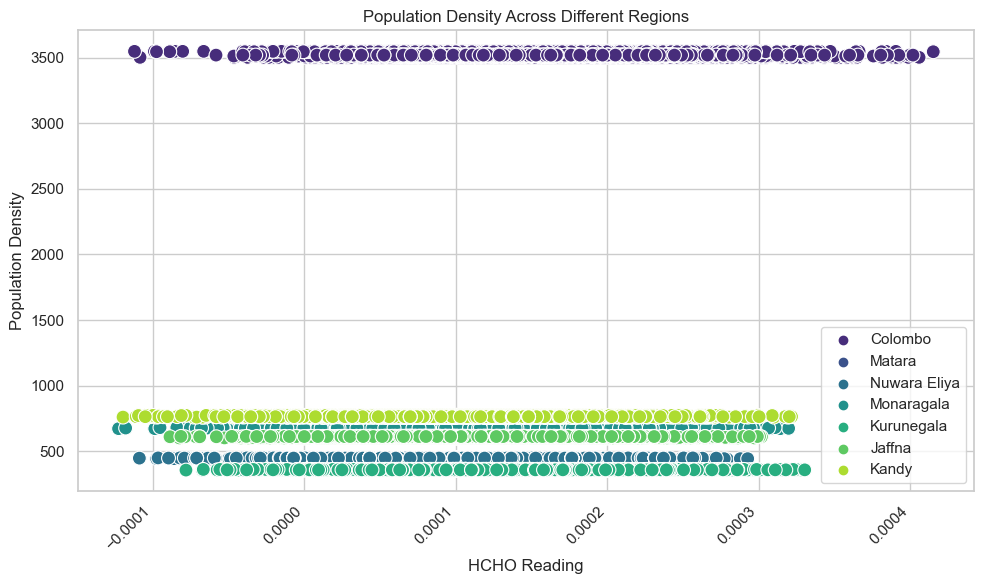

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'Region' column to each DataFrame
colombo_population['Region'] = 'Colombo'
matara_population['Region'] = 'Matara'
nuwara_eliya_population['Region'] = 'Nuwara Eliya'
monaragala_population['Region'] = 'Monaragala'
kurunegala_population['Region'] = 'Kurunegala'
jaffna_population['Region'] = 'Jaffna'
kandy_population['Region'] = 'Kandy'

# Combine data from all regions
population_data = pd.concat([colombo_population, matara_population, nuwara_eliya_population, 
                      monaragala_population, kurunegala_population, jaffna_population, 
                      kandy_population])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=population_data, x='HCHO reading', y='population_density', hue='Region', palette='viridis', s=100)
plt.xticks(rotation=45, ha='right')
plt.xlabel('HCHO Reading')
plt.ylabel('Population Density')
plt.title('Population Density Across Different Regions')
plt.legend()
plt.tight_layout()
plt.show()

In [190]:
population_data.corr(numeric_only=True)

,HCHO reading,Population,Area_sq_km,population_density
HCHO reading,1.000000,0.296439,0.055384,0.250312
Population,0.296439,1.000000,0.190473,0.771794
Area_sq_km,0.055384,0.190473,1.000000,-0.439454
population_density,0.250312,0.771794,-0.439454,1.000000


In [191]:
population_data.corr(numeric_only=True)["HCHO reading"]

HCHO reading          1.000000
Population            0.296439
Area_sq_km            0.055384
population_density    0.250312
Name: HCHO reading, dtype: float64

##### There is a slight correlation between HCHO reading and population density with 0.25 
##### and population with 0.29

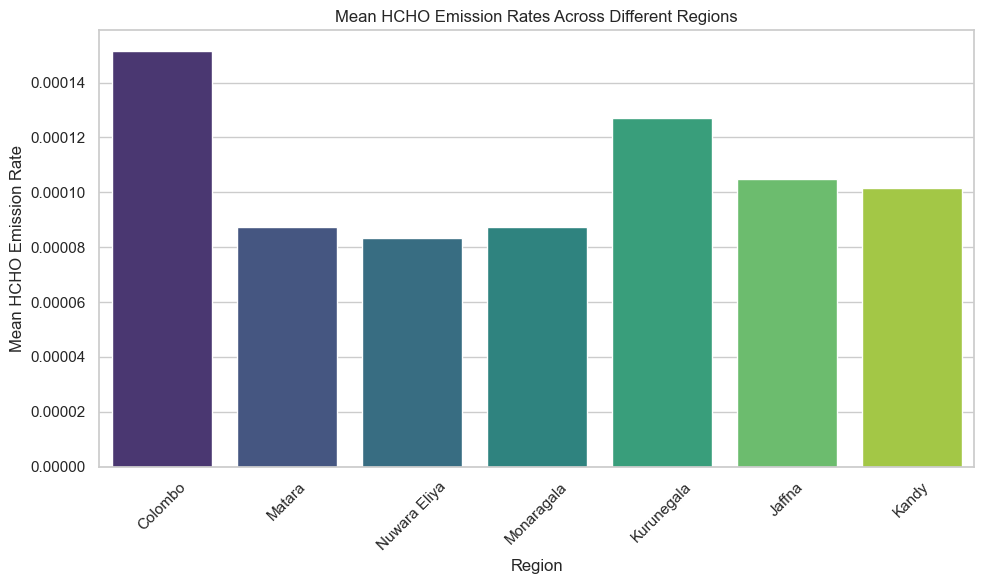

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_hcho_data = pd.DataFrame({
    'Region': ['Colombo', 'Matara', 'Nuwara Eliya', 'Monaragala', 'Kurunegala', 'Jaffna', 'Kandy'],
    'Mean HCHO Emission Rate': [
        colombo_population['HCHO reading'].mean(),
        matara_population['HCHO reading'].mean(),
        nuwara_eliya_population['HCHO reading'].mean(),
        monaragala_population['HCHO reading'].mean(),
        kurunegala_population['HCHO reading'].mean(),
        jaffna_population['HCHO reading'].mean(),
        kandy_population['HCHO reading'].mean()
    ]
})

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Mean HCHO Emission Rate', data=mean_hcho_data, palette='viridis')
plt.title('Mean HCHO Emission Rates Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Mean HCHO Emission Rate')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'Region' column to each DataFrame
colombo_population['Region'] = 'Colombo'
matara_population['Region'] = 'Matara'
nuwara_eliya_population['Region'] = 'Nuwara Eliya'
monaragala_population['Region'] = 'Monaragala'
kurunegala_population['Region'] = 'Kurunegala'
jaffna_population['Region'] = 'Jaffna'
kandy_population['Region'] = 'Kandy'

# Combine data from all regions
monthly_data = pd.concat([colombo_population, matara_population, nuwara_eliya_population, 
                      monaragala_population, kurunegala_population, jaffna_population, 
                      kandy_population])

monthly_data['Date'] = pd.to_datetime(monthly_data['Current Date'])
monthly_data['Month'] = monthly_data['Date'].dt.month
monthly_mean_data = monthly_data.groupby(['Month', 'Region']).agg({'HCHO reading': 'mean', 'Population': 'mean', 
                                                                  'population_density': 'mean'}).reset_index()
# Display mean HCHO emission rates and population for each region
print(monthly_mean_data)

    Month        Region  HCHO reading  Population  population_density
0       1       Colombo      0.000200   2464200.0            3525.322
1       1        Jaffna      0.000077    624200.0             608.974
2       1         Kandy      0.000088   1488200.0             767.112
3       1    Kurunegala      0.000120   1731400.0             359.512
4       1        Matara      0.000093    869000.0             677.320
..    ...           ...           ...         ...                 ...
79     12         Kandy      0.000098   1488200.0             767.112
80     12    Kurunegala      0.000114   1731400.0             359.512
81     12        Matara      0.000093    869000.0             677.320
82     12    Monaragala      0.000093    869000.0             677.320
83     12  Nuwara Eliya      0.000059    777000.0             446.296

[84 rows x 5 columns]


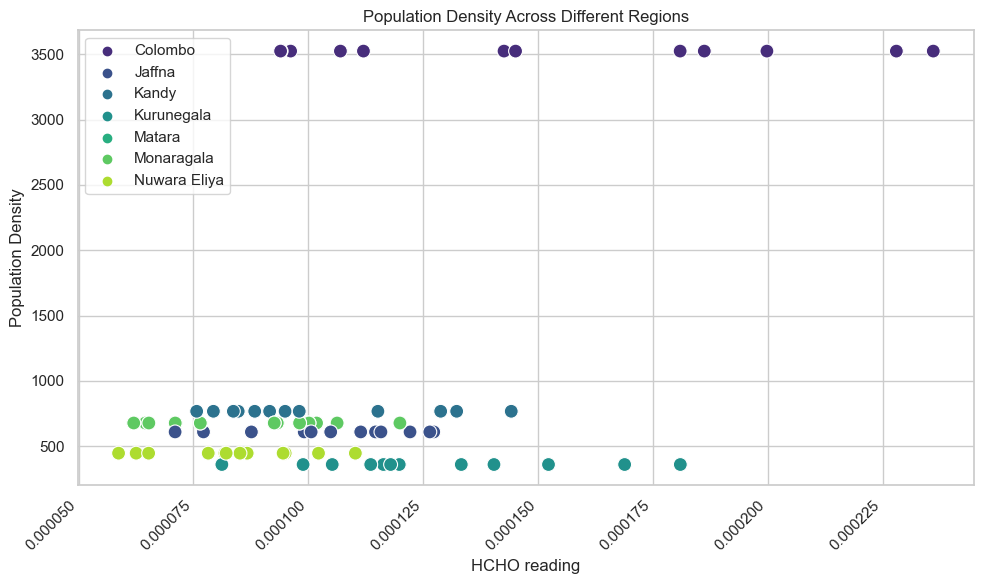

In [193]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=monthly_mean_data, x='HCHO reading', y='population_density', hue='Region', palette='viridis', s=100)
plt.xticks(rotation=45, ha='right')
plt.xlabel('HCHO reading')
plt.ylabel('Population Density')
plt.title('Population Density Across Different Regions')
plt.legend()
plt.tight_layout()
plt.show()

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'Region' column to each DataFrame
colombo_population['Region'] = 'Colombo'
matara_population['Region'] = 'Matara'
nuwara_eliya_population['Region'] = 'Nuwara Eliya'
monaragala_population['Region'] = 'Monaragala'
kurunegala_population['Region'] = 'Kurunegala'
jaffna_population['Region'] = 'Jaffna'
kandy_population['Region'] = 'Kandy'

# Combine data from all regions
yearly_data = pd.concat([colombo_population, matara_population, nuwara_eliya_population, 
                      monaragala_population, kurunegala_population, jaffna_population, 
                      kandy_population])

yearly_data['Date'] = pd.to_datetime(yearly_data['Current Date'])
yearly_data['Year'] = yearly_data['Date'].dt.year                      
yearly_mean_data = yearly_data.groupby(['Year', 'Region']).agg({'HCHO reading': 'mean', 'Population': 'mean', 
                                                                  'population_density': 'mean'}).reset_index()
# Display mean HCHO emission rates and population for each region
yearly_mean_data.sort_values("Region", inplace=True)

In [185]:
yearly_mean_data

,Year,Region,HCHO reading,Population,population_density
0,2019,Colombo,0.000155,2448000.0,3502.15
14,2021,Colombo,0.000142,2480000.0,3547.93
21,2022,Colombo,0.000148,2478000.0,3545.06
7,2020,Colombo,0.000156,2455000.0,3512.16
28,2023,Colombo,0.000156,2460000.0,3519.31
22,2022,Jaffna,0.000102,629000.0,613.66
15,2021,Jaffna,0.000097,626000.0,610.73
8,2020,Jaffna,0.000106,621000.0,605.85
1,2019,Jaffna,0.000108,617000.0,601.95
29,2023,Jaffna,0.000111,628000.0,612.68


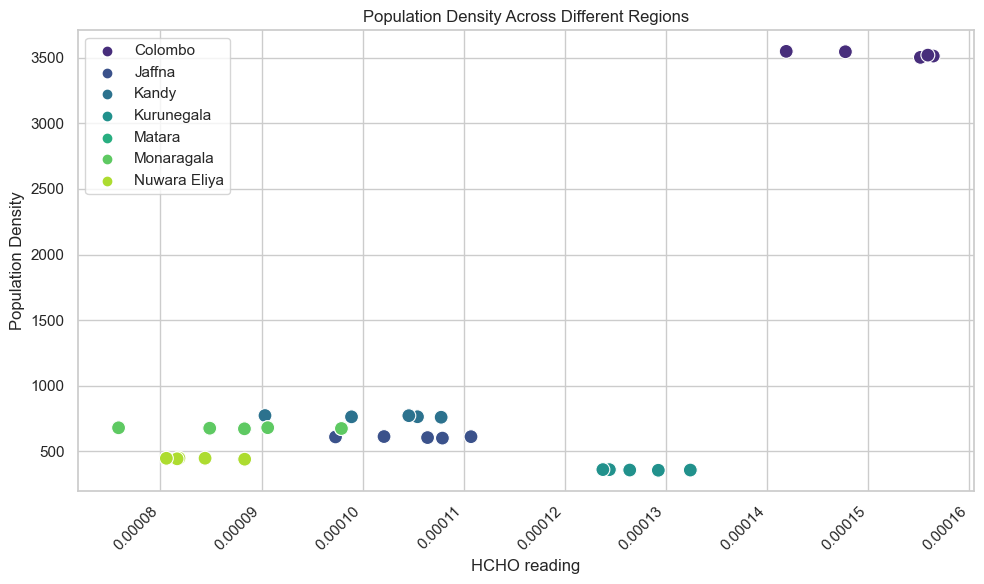

In [194]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_mean_data, x='HCHO reading', y='population_density', hue='Region', palette='viridis', s=100)
plt.xticks(rotation=45, ha='right')
plt.xlabel('HCHO reading')
plt.ylabel('Population Density')
plt.title('Population Density Across Different Regions')
plt.legend()
plt.tight_layout() 
plt.show()

In [187]:
yearly_mean_data.to_csv("../FomaldihydeAnalysis/OtherData/yearly_hcho_with_population")

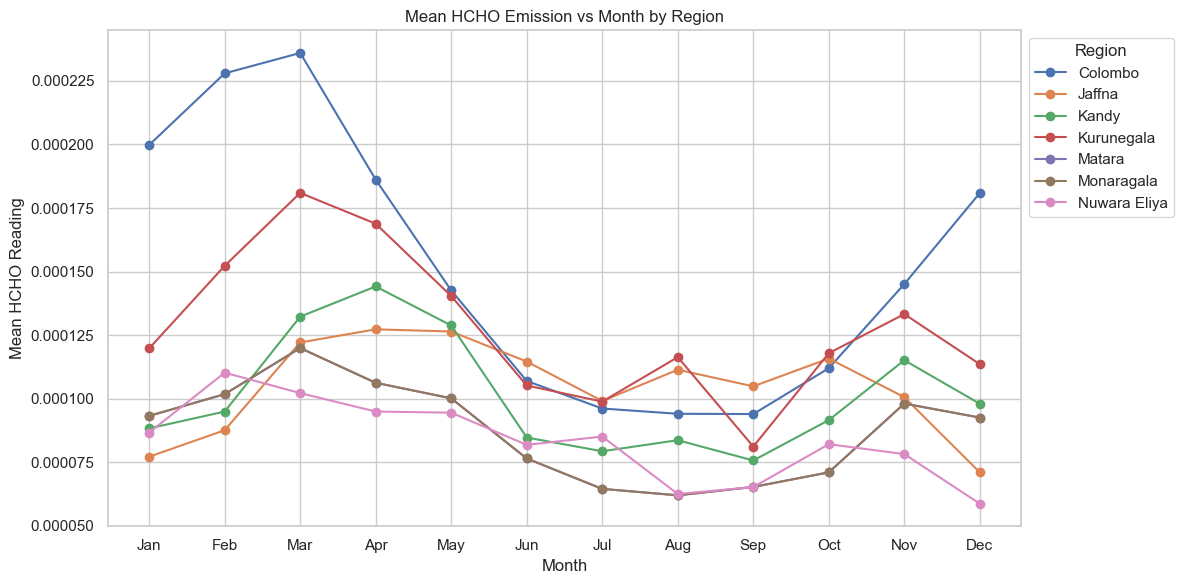

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create line plot for mean HCHO emission rates
plt.figure(figsize=(12, 6))
for region, data in monthly_mean_data.groupby('Region'):
    plt.plot(data['Month'], data['HCHO reading'], marker='o', label=region)

plt.title('Mean HCHO Emission vs Month by Region')
plt.xlabel('Month')
plt.ylabel('Mean HCHO Reading')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()